In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

# [barplot palette]
---

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [2]:
# 계절성 보정 사용자 함수 (연도-분기 버전)

def seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '1분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '1분기'), '총구매액'] / 0.9476399112)
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '2분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '2분기'), '총구매액'] / 0.9785290501)    
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '3분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '3분기'), '총구매액'] / 0.9072731695)    
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '4분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '4분기'), '총구매액'] / 1.166557869)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '1분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '1분기'), '총구매액'] / 0.9748289537)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '2분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '2분기'), '총구매액'] / 0.9784250528)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '3분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '3분기'), '총구매액'] / 0.912781587)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '4분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '4분기'), '총구매액'] / 1.133964406)
    df1['총구매액'] = df1['총구매액'].astype('int64')
    return df1

In [3]:
# 계절성 보정 사용자 함수 (기수 버전)

def new_seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[df1['기'] == '1기', '총구매액'] = np.round(df1.loc[df1['기'] == '1기', '총구매액'] / 0.9476399112)
    df1.loc[df1['기'] == '2기', '총구매액'] = np.round(df1.loc[df1['기'] == '2기', '총구매액'] / 0.9785290501)    
    df1.loc[df1['기'] == '3기', '총구매액'] = np.round(df1.loc[df1['기'] == '3기', '총구매액'] / 0.9072731695)    
    df1.loc[df1['기'] == '4기', '총구매액'] = np.round(df1.loc[df1['기'] == '4기', '총구매액'] / 1.166557869)    
    df1.loc[df1['기'] == '5기', '총구매액'] = np.round(df1.loc[df1['기'] == '5기', '총구매액'] / 0.9748289537)    
    df1.loc[df1['기'] == '6기', '총구매액'] = np.round(df1.loc[df1['기'] == '6기', '총구매액'] / 0.9784250528)    
    df1.loc[df1['기'] == '7기', '총구매액'] = np.round(df1.loc[df1['기'] == '7기', '총구매액'] / 0.912781587)    
    df1.loc[df1['기'] == '8기', '총구매액'] = np.round(df1.loc[df1['기'] == '8기', '총구매액'] / 1.133964406)
    df1['총구매액'] = df1['총구매액'].astype('int64')
    return df1

In [4]:
# 감소고객

con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
WHERE 고객구분 = '감소'
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분', '기', '총구매액']
df_down = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()

display(df_down.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,177650
1,00001,M,60세이상,서울,선매품,가구/인테리어,감소,3기,63840
2,00001,M,60세이상,서울,선매품,가구/인테리어,감소,4기,4706400
3,00001,M,60세이상,서울,선매품,가구/인테리어,감소,5기,85500
4,00001,M,60세이상,서울,선매품,가구/인테리어,감소,6기,491750


In [100]:
# 감소고객 (1기, 7기만)

df_down_re = df_down.loc[(df_down['기'] == '1기') | (df_down['기'] == '7기')]
display(df_down_re.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,177650
9,00001,M,60세이상,서울,선매품,디지털/가전,감소,7기,1800000
10,00001,M,60세이상,서울,선매품,유아동,감소,1기,103740
13,00001,M,60세이상,서울,선매품,의류,감소,1기,5001720
19,00001,M,60세이상,서울,선매품,의류,감소,7기,4491460


In [101]:
# 증가고객

con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
WHERE 고객구분 = '증가'
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분', '기', '총구매액']
df_up = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()

display(df_up.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00002,M,60세이상,경기,선매품,가구/인테리어,증가,1기,474900
1,00002,M,60세이상,경기,선매품,가구/인테리어,증가,2기,55800
2,00002,M,60세이상,경기,선매품,가구/인테리어,증가,4기,47600
3,00002,M,60세이상,경기,선매품,가구/인테리어,증가,5기,78120
4,00002,M,60세이상,경기,선매품,가구/인테리어,증가,7기,290910


In [102]:
# 증가고객 (1기, 7기만)

df_up_re = df_up.loc[(df_up['기'] == '1기') | (df_up['기'] == '7기')]
display(df_up_re.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00002,M,60세이상,경기,선매품,가구/인테리어,증가,1기,474900
4,00002,M,60세이상,경기,선매품,가구/인테리어,증가,7기,290910
5,00002,M,60세이상,경기,선매품,디지털/가전,증가,1기,295000
9,00002,M,60세이상,경기,선매품,디지털/가전,증가,7기,3381650
10,00002,M,60세이상,경기,선매품,유아동,증가,1기,113920


In [3]:
# 고정고객

con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분', '기', '총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()

display(df_all.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,177650
1,00001,M,60세이상,서울,선매품,가구/인테리어,감소,3기,63840
2,00001,M,60세이상,서울,선매품,가구/인테리어,감소,4기,4706400
3,00001,M,60세이상,서울,선매품,가구/인테리어,감소,5기,85500
4,00001,M,60세이상,서울,선매품,가구/인테리어,감소,6기,491750


In [104]:
# 고정고객 (1기, 7기만)

df_all_re = df_all.loc[(df_all['기'] == '1기') | (df_all['기'] == '7기')]
display(df_all_re.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,177650
9,00001,M,60세이상,서울,선매품,디지털/가전,감소,7기,1800000
10,00001,M,60세이상,서울,선매품,유아동,감소,1기,103740
13,00001,M,60세이상,서울,선매품,의류,감소,1기,5001720
19,00001,M,60세이상,서울,선매품,의류,감소,7기,4491460


# # 세분류
---

## # 고정고객
---

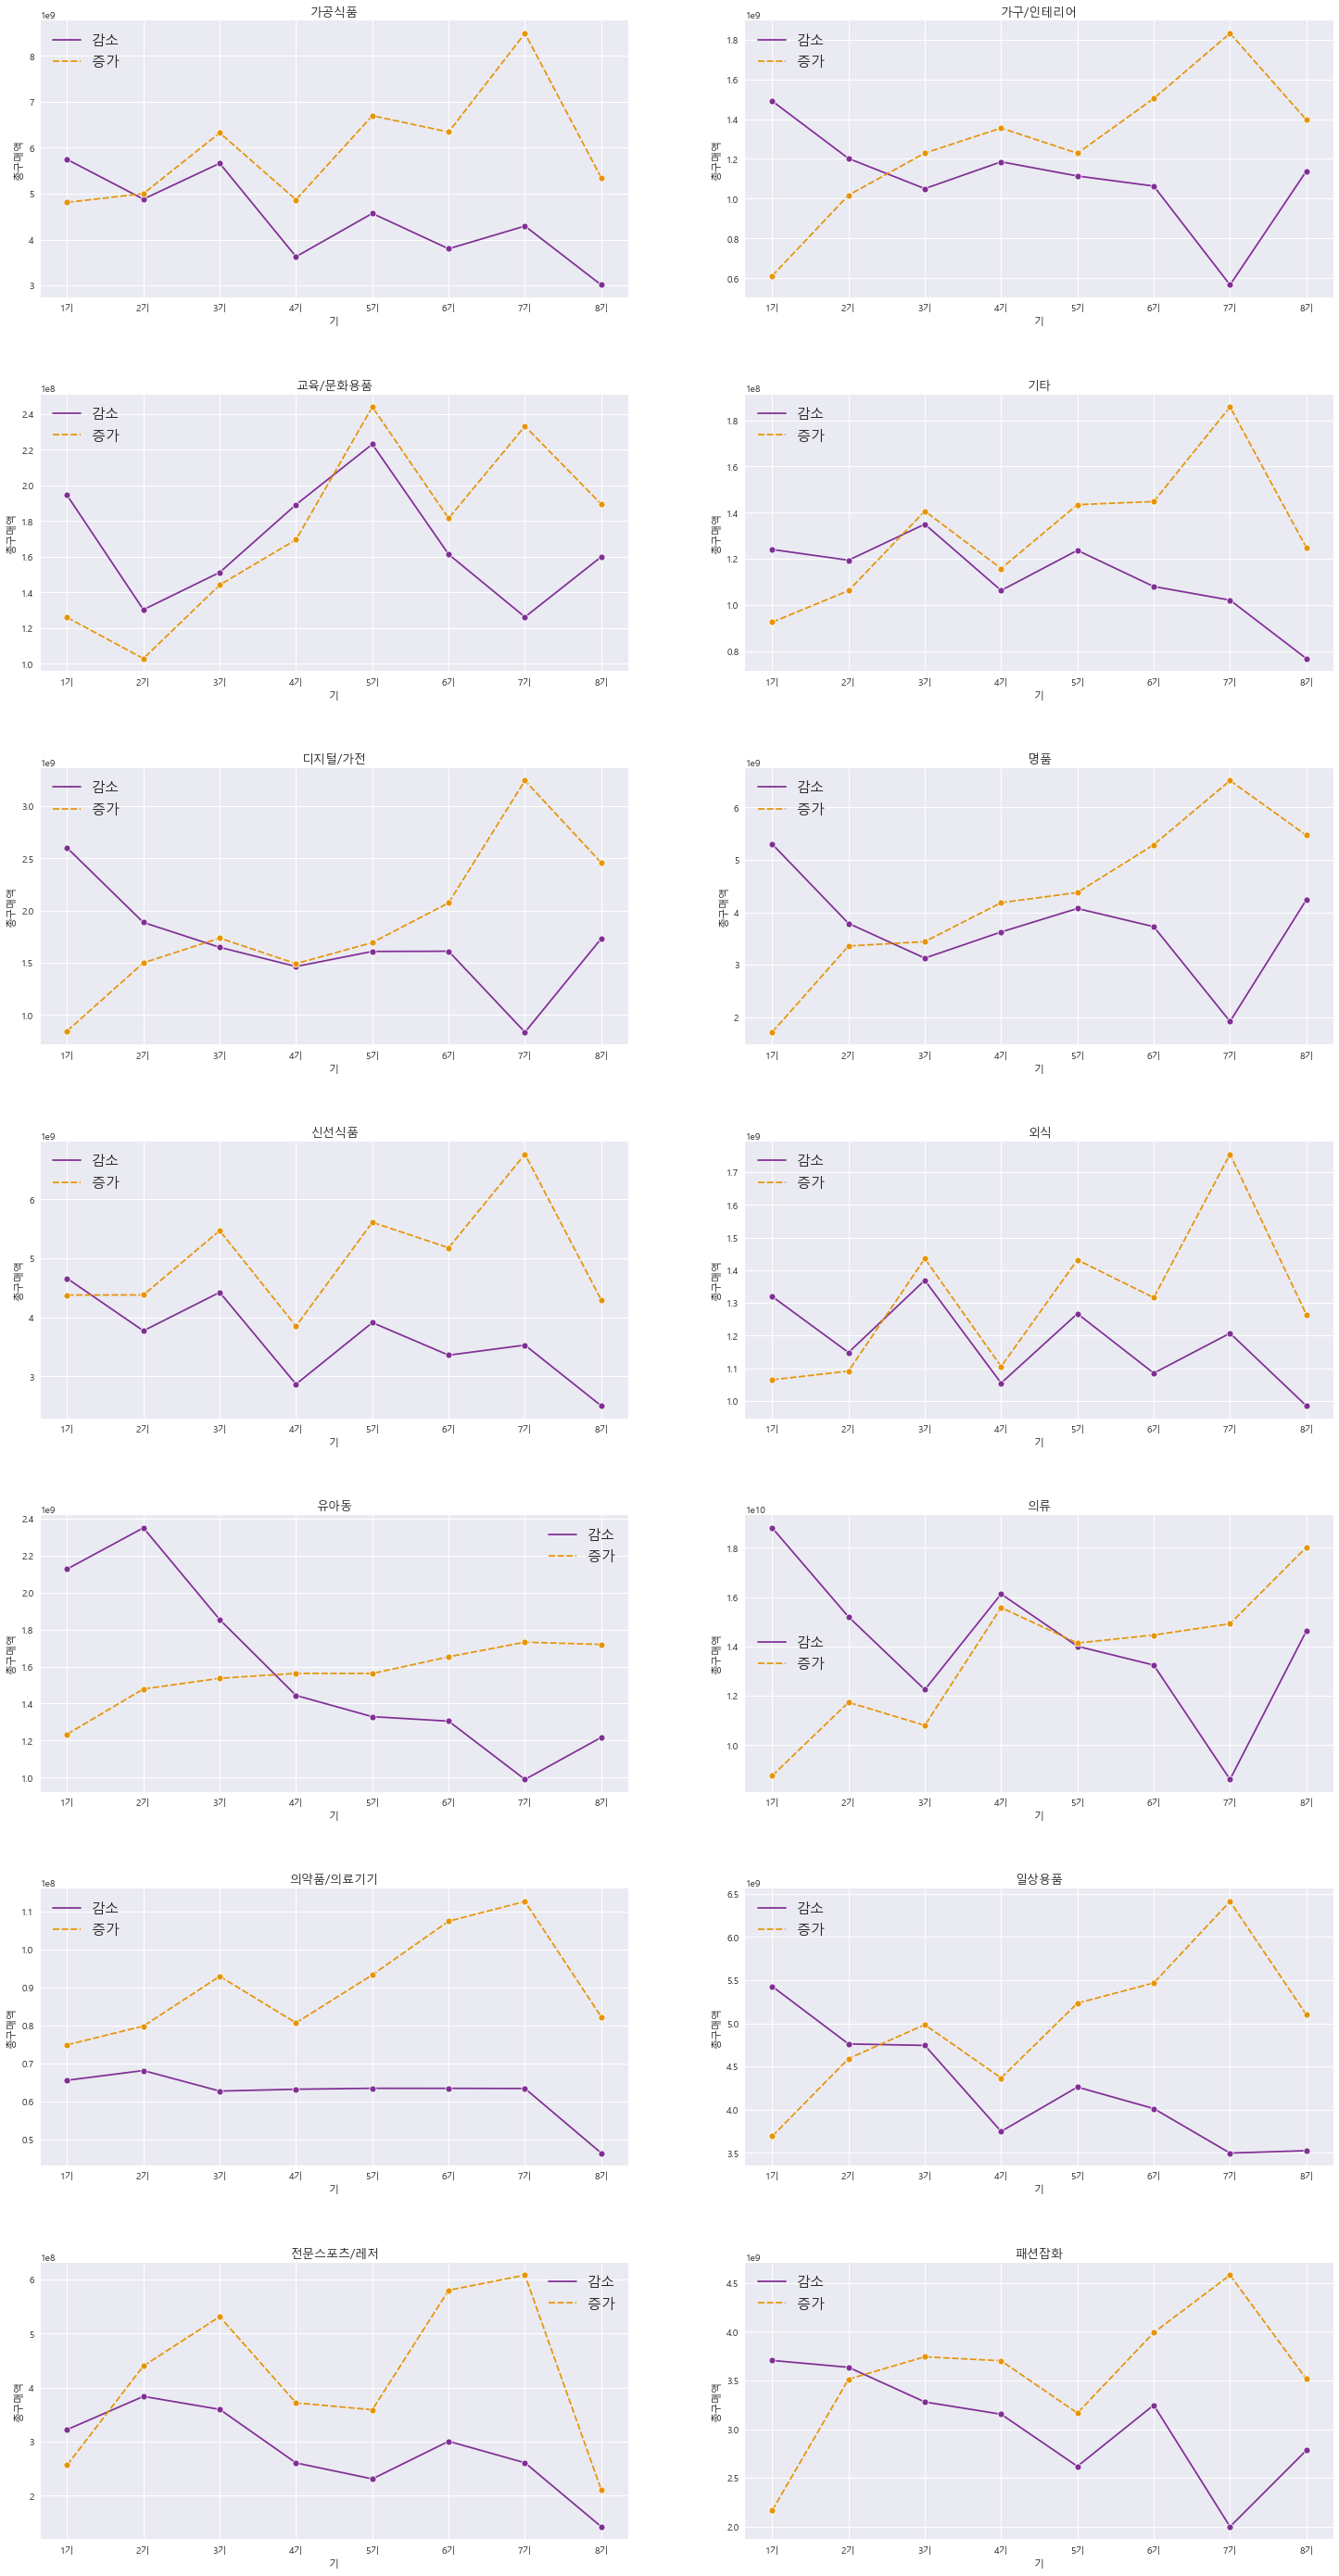

In [79]:
df_all_scaled = new_seasonal_scaled(df_all)
df_all_scaled1 = df_all_scaled.groupby(['분류', '고객구분', '기']).sum().reset_index()

fig = plt.figure(figsize = (25, 50))
for i, j in enumerate(df_all_scaled1['분류'].unique()):
    fig.add_subplot(7, 2, i+1)
    sns.lineplot(data = df_all_scaled1.loc[df_all_scaled1['분류'] == f'{j}'], x = '기', y = '총구매액', hue = '고객구분', style = '고객구분', marker = 'o', palette = 'CMRmap')
    plt.legend(fontsize = 15)
    plt.title(j, fontsize = 13)
    plt.subplots_adjust(hspace = 0.35)
plt.show()

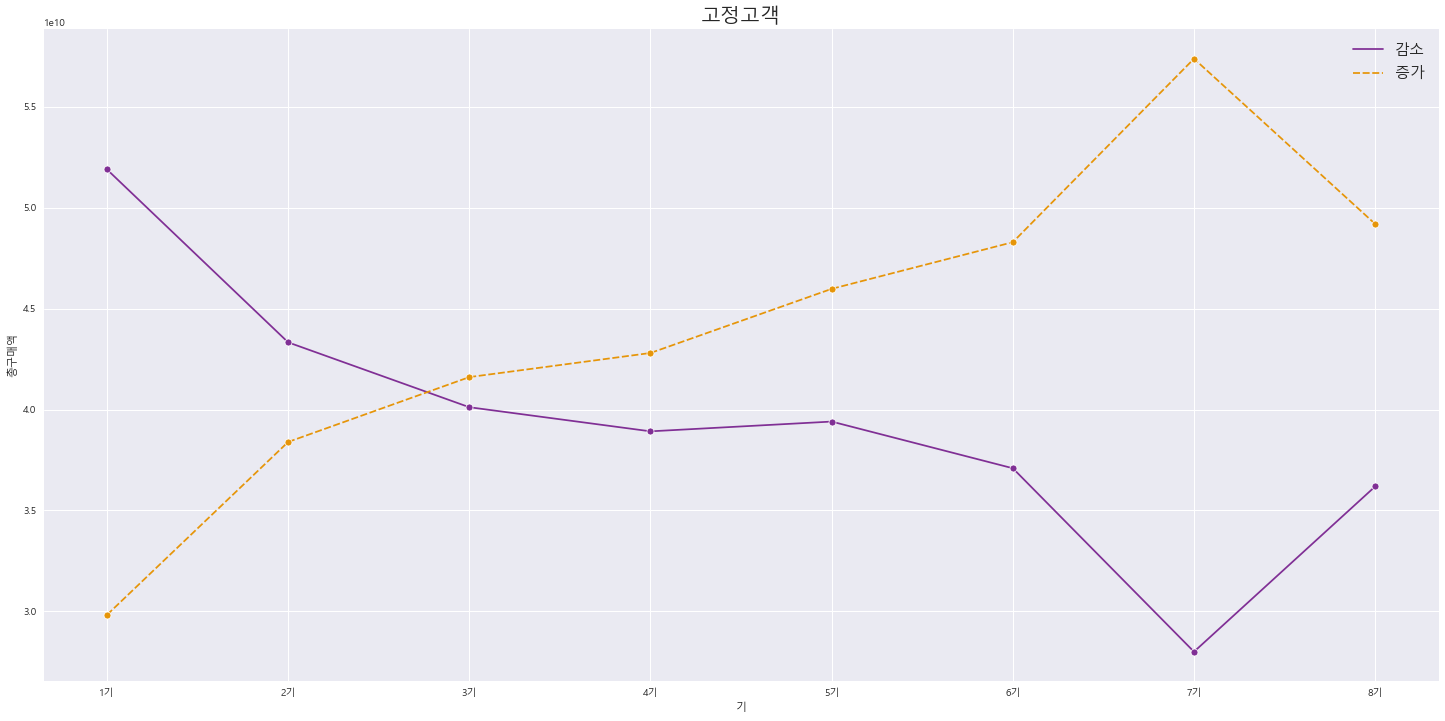

In [6]:
df_all_scaled = new_seasonal_scaled(df_all)
df_all_scaled1 = df_all_scaled.groupby(['고객구분', '기']).sum().reset_index()

plt.figure(figsize = (25, 12))
sns.lineplot(data = df_all_scaled1, x = '기', y = '총구매액', hue = '고객구분', style = '고객구분', marker = 'o', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.title('고정고객', fontsize = 20)
plt.subplots_adjust(hspace = 0.35)
plt.show()

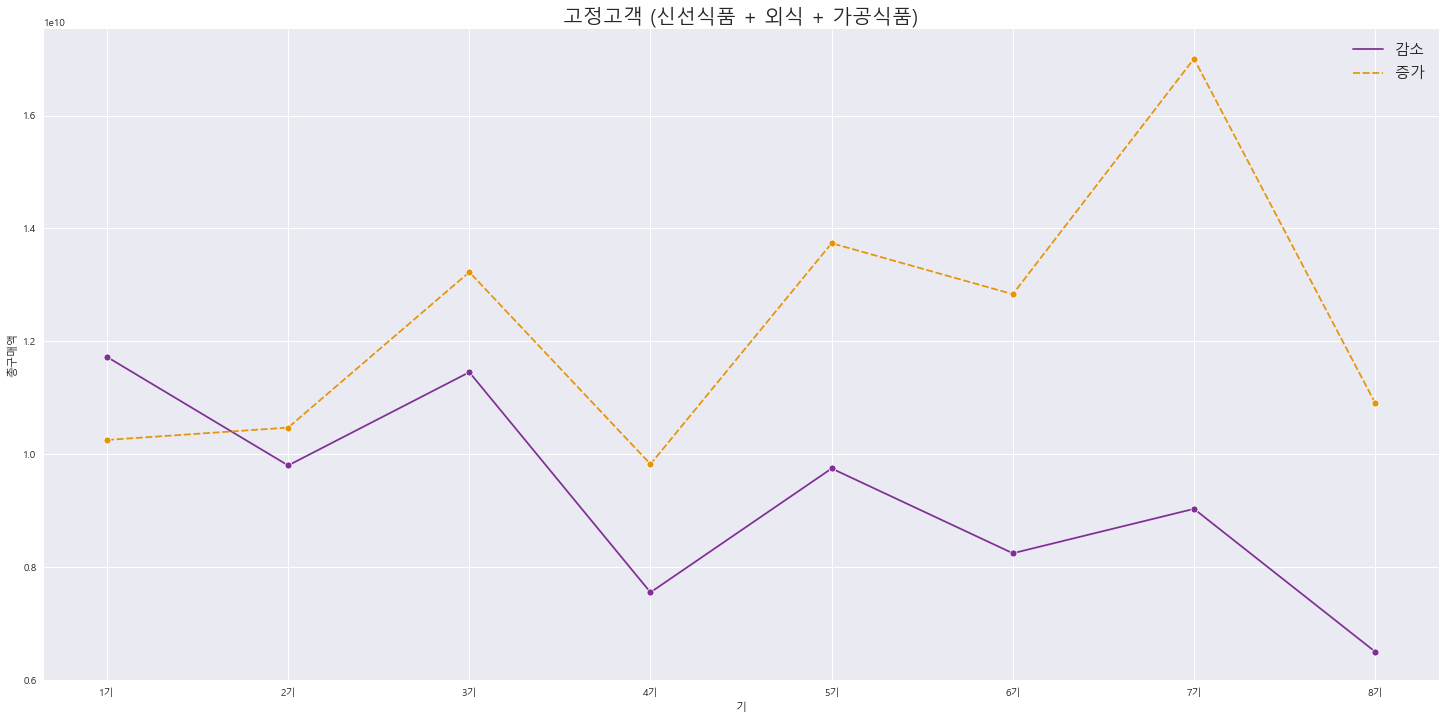

In [20]:
df_all_scaled1 = df_all_scaled.loc[(df_all_scaled['분류'] == '신선식품') | (df_all_scaled['분류'] == '가공식품') | (df_all_scaled['분류'] == '외식')].groupby(['고객구분', '기']).sum().reset_index()

plt.figure(figsize = (25, 12))
sns.lineplot(data = df_all_scaled1, x = '기', y = '총구매액', hue = '고객구분', style = '고객구분', marker = 'o', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.title('고정고객 (신선식품 + 외식 + 가공식품)', fontsize = 20)
plt.subplots_adjust(hspace = 0.35)
plt.show()

## # 감소고객
---

In [10]:
df_down_scaled = new_seasonal_scaled(df_down)

In [98]:
df1 = seasonal_scaled(df).copy()
df2 = df1.groupby(['연도', '분기', '세분류명']).sum()
df2 = df2.reset_index()

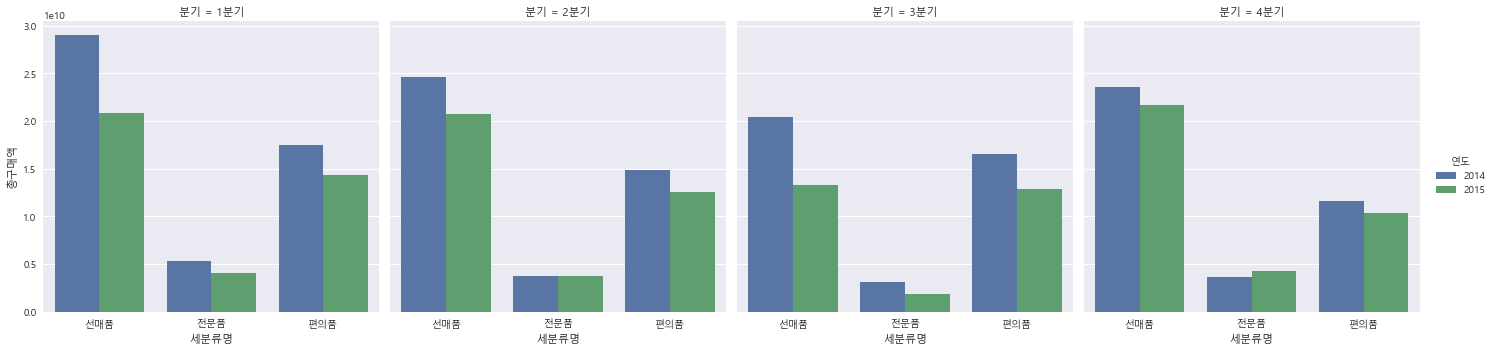

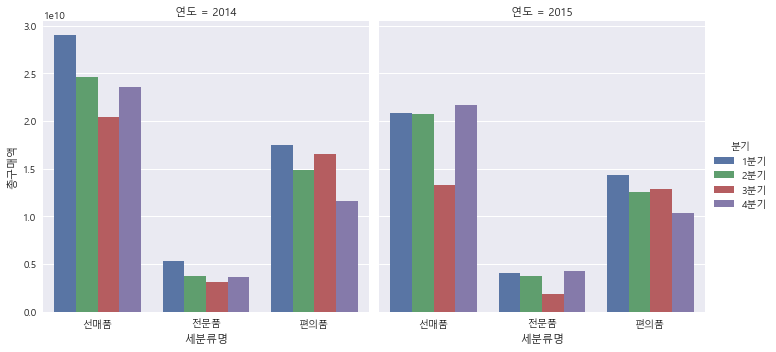

In [99]:
sns.catplot(data = df2, x = '세분류명', y = '총구매액', hue = '연도', col = '분기', kind = 'bar')
plt.show()

sns.catplot(data = df2, x = '세분류명', y = '총구매액', hue = '분기', col = '연도', kind = 'bar')
plt.show()

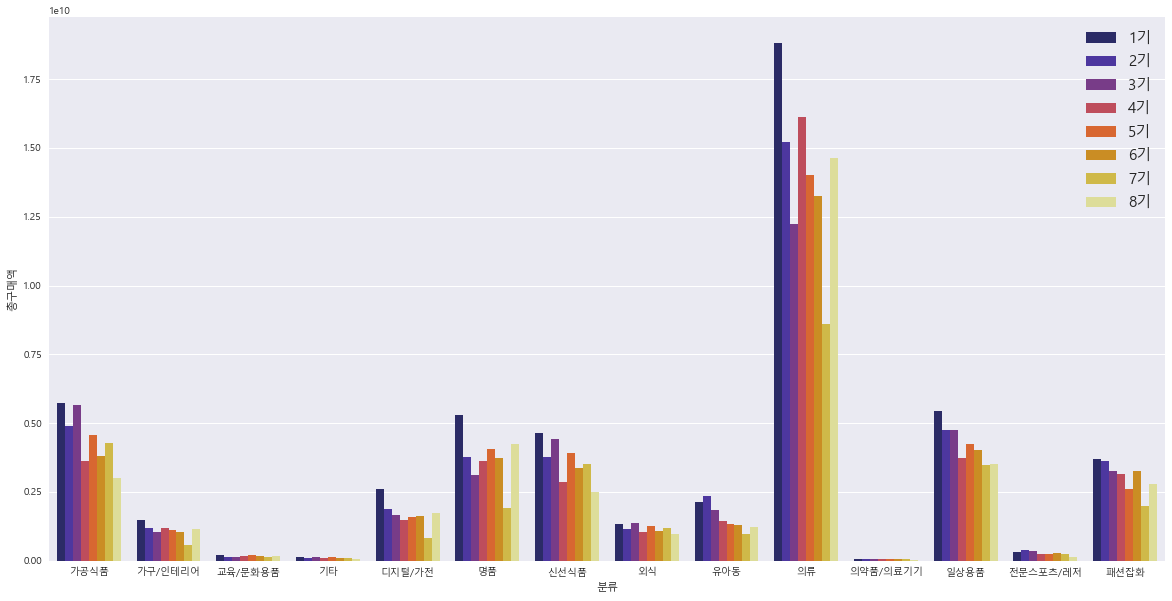

In [107]:
df_down_scaled = new_seasonal_scaled(df_down)
df_down_scaled = df_down_scaled.groupby(['기', '분류']).sum()
df_down_scaled = df_down_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.show()

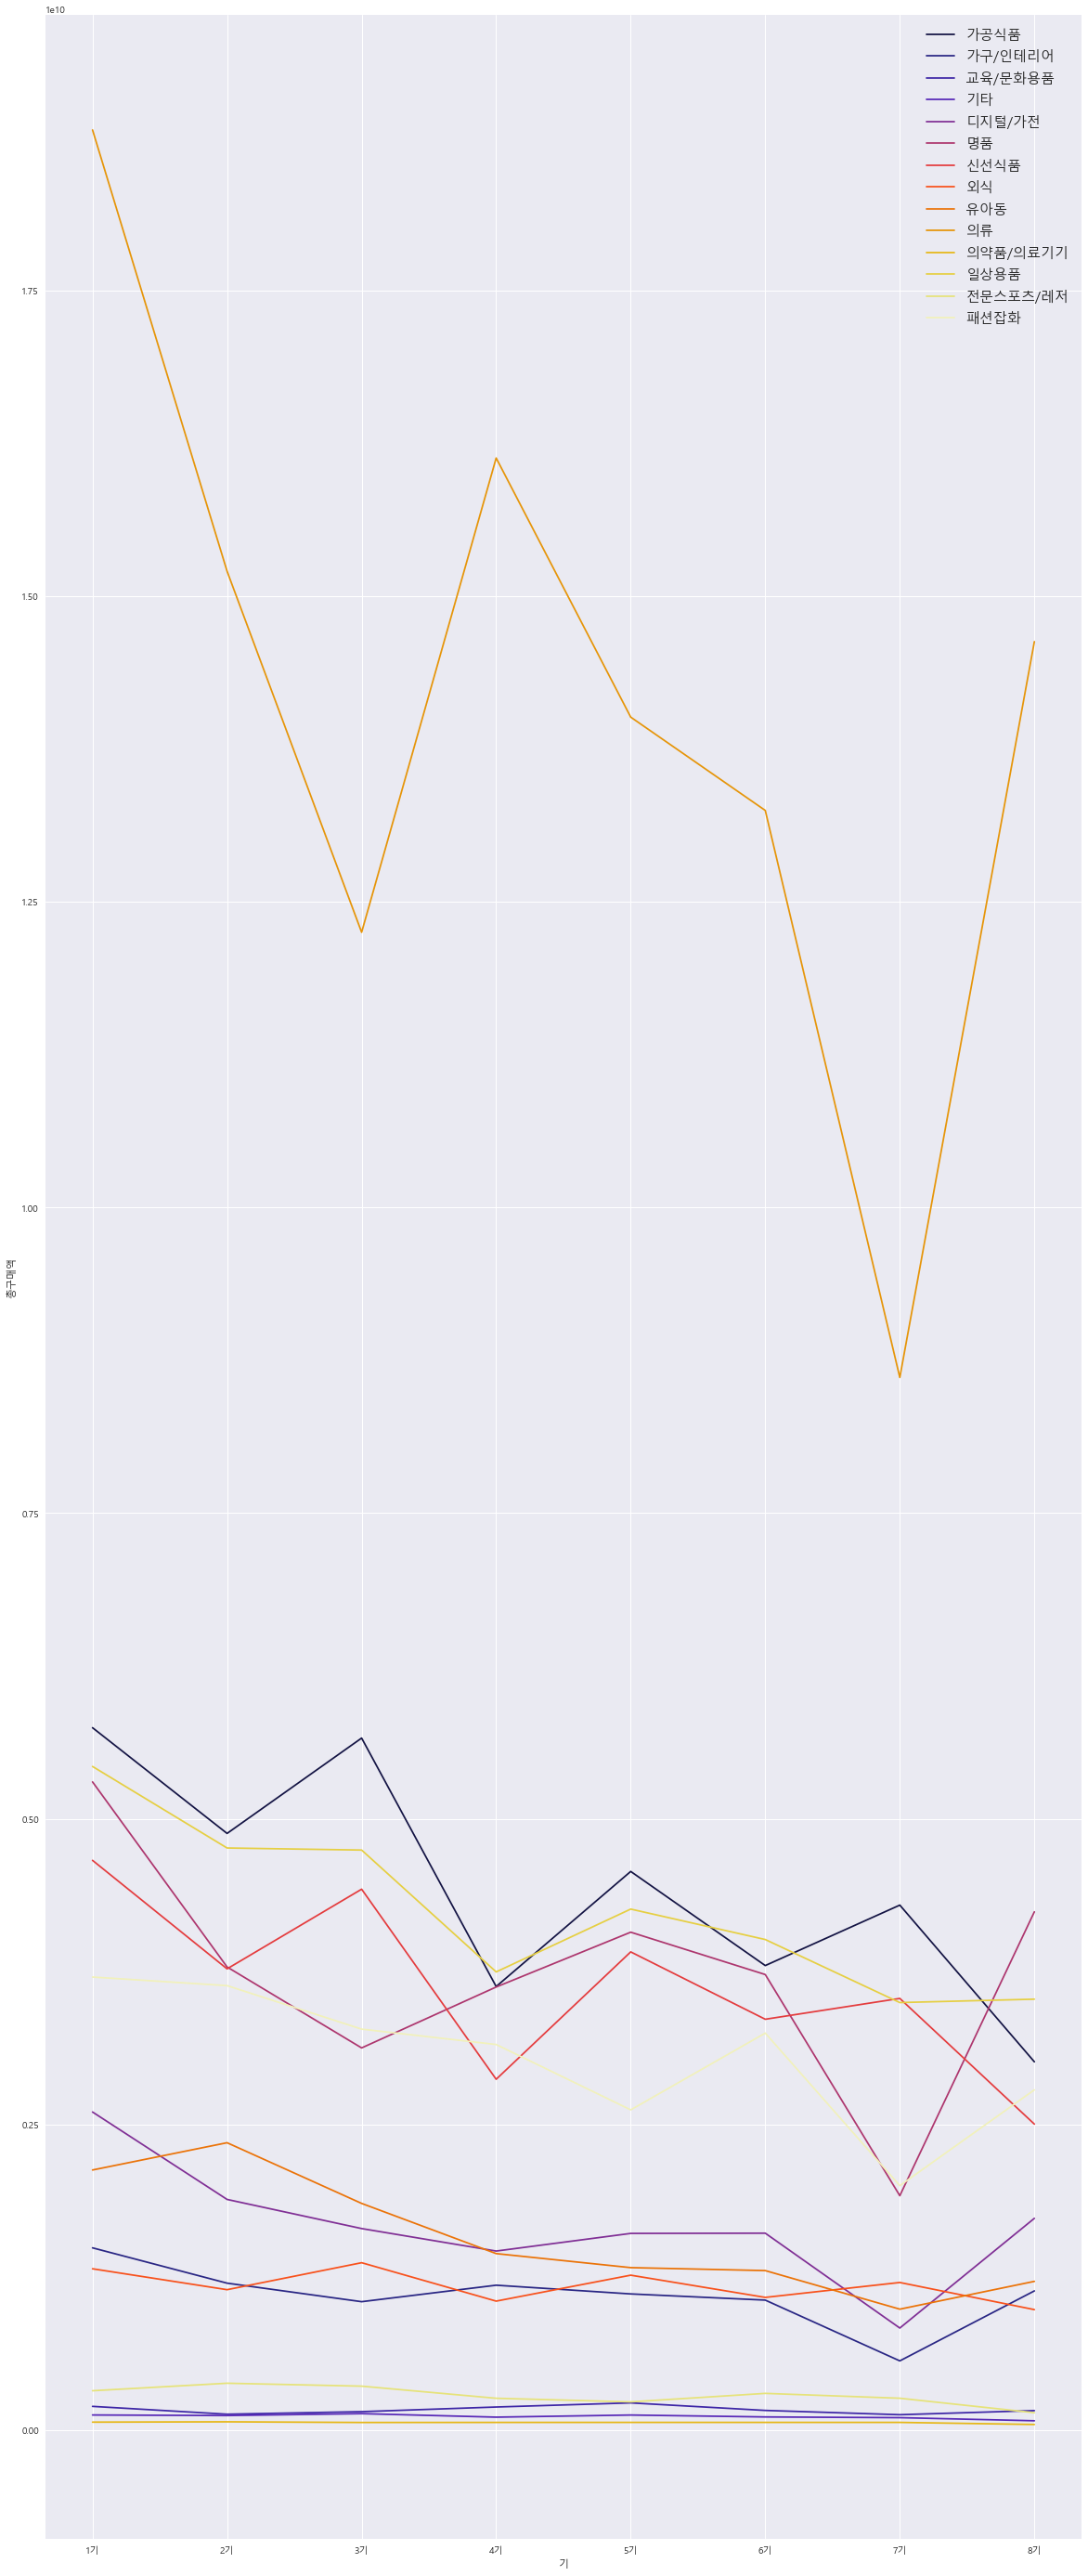

In [45]:
df_down_scaled = new_seasonal_scaled(df_down)
df_down_scaled = df_down_scaled.groupby(['기', '분류']).sum()
df_down_scaled = df_down_scaled.reset_index()

plt.figure(figsize = (20, 50))
sns.lineplot(data = df_down_scaled, x = '기', y = '총구매액', hue = '분류', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.show()

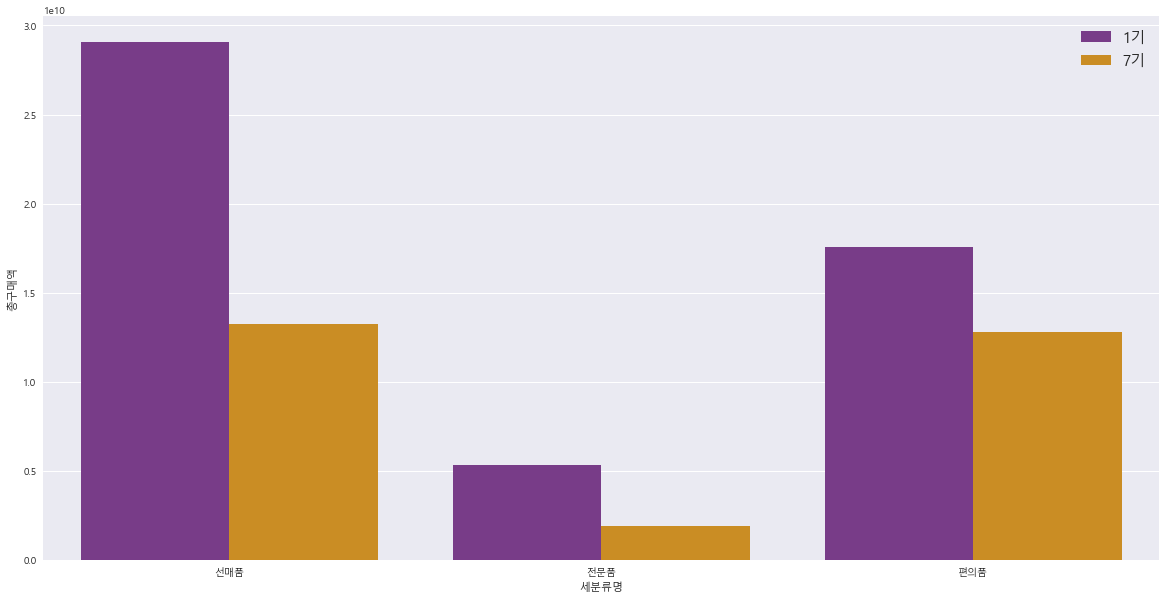

In [83]:
df_down_re_scaled = new_seasonal_scaled(df_down_re)
df_down_re_scaled = df_down_re_scaled.groupby(['기', '세분류명']).sum()
df_down_re_scaled = df_down_re_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_re_scaled, x = '세분류명', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.show()

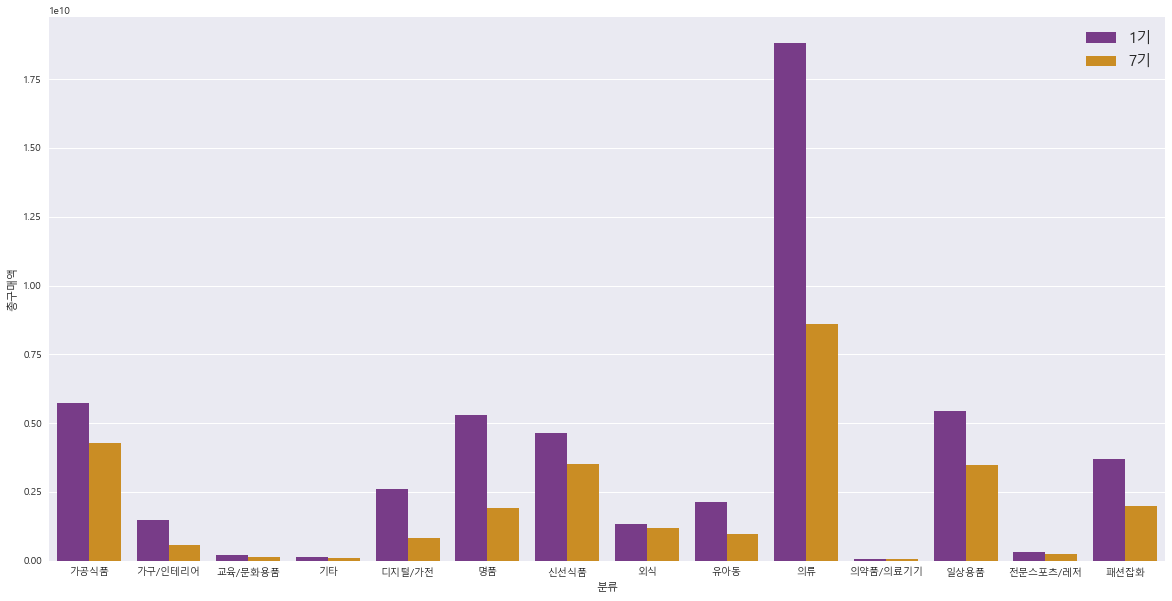

In [108]:
df_down_re_scaled = new_seasonal_scaled(df_down_re)
df_down_re_scaled = df_down_re_scaled.groupby(['기', '분류']).sum()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.show()

### # 성별
---

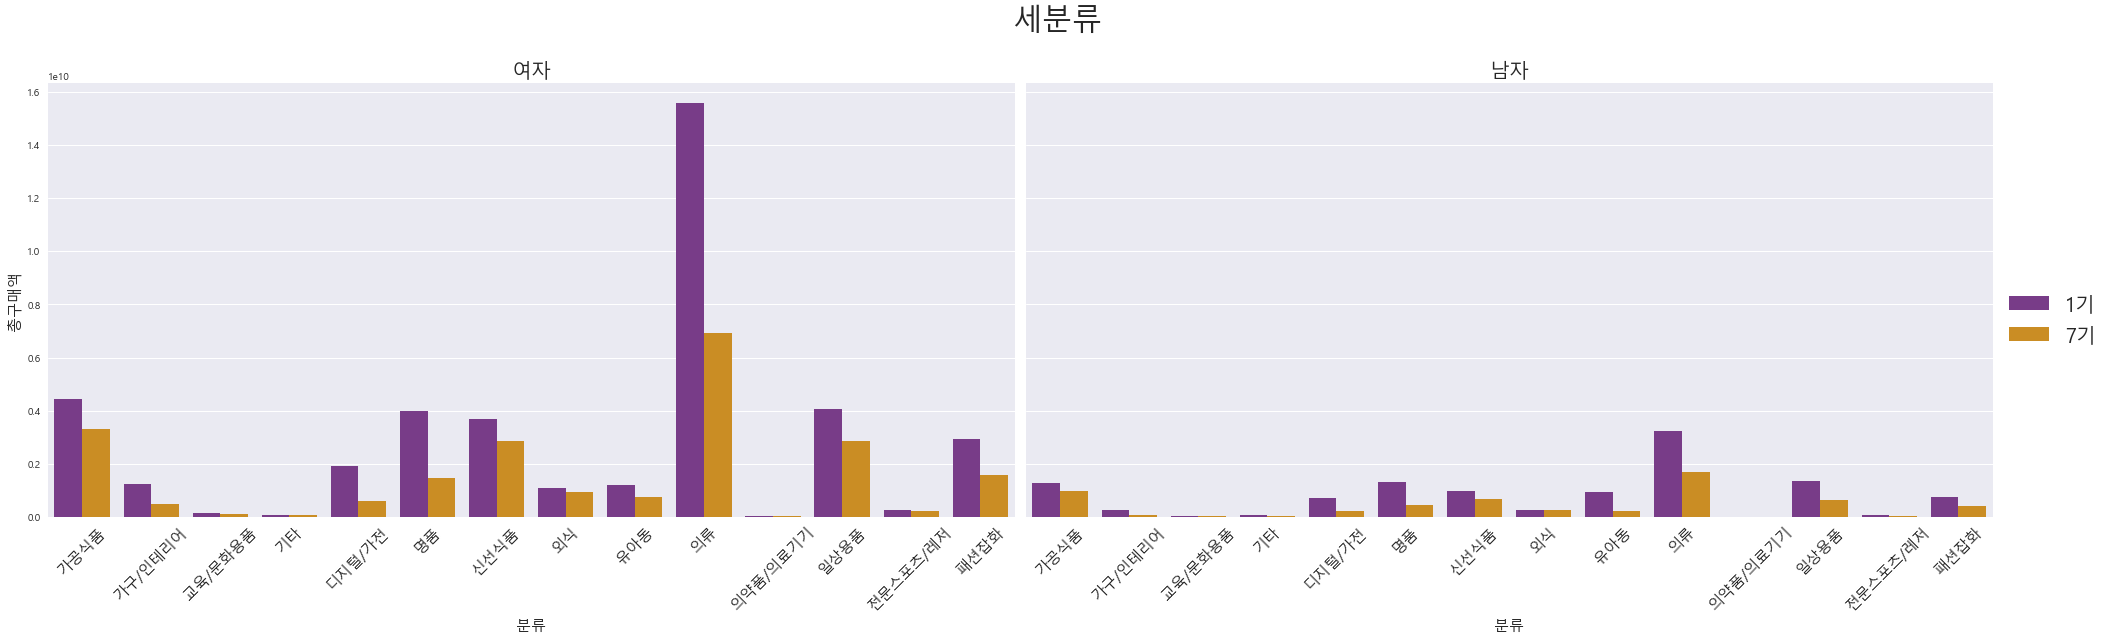

In [227]:
df_down_re_scaled = new_seasonal_scaled(df_down_re)
df_down_re_scaled = df_down_re_scaled.groupby(['성별', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '성별', height = 7, aspect = 2, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
ax1.set_title('여자', fontsize = 20)
ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

### # 연령대
---

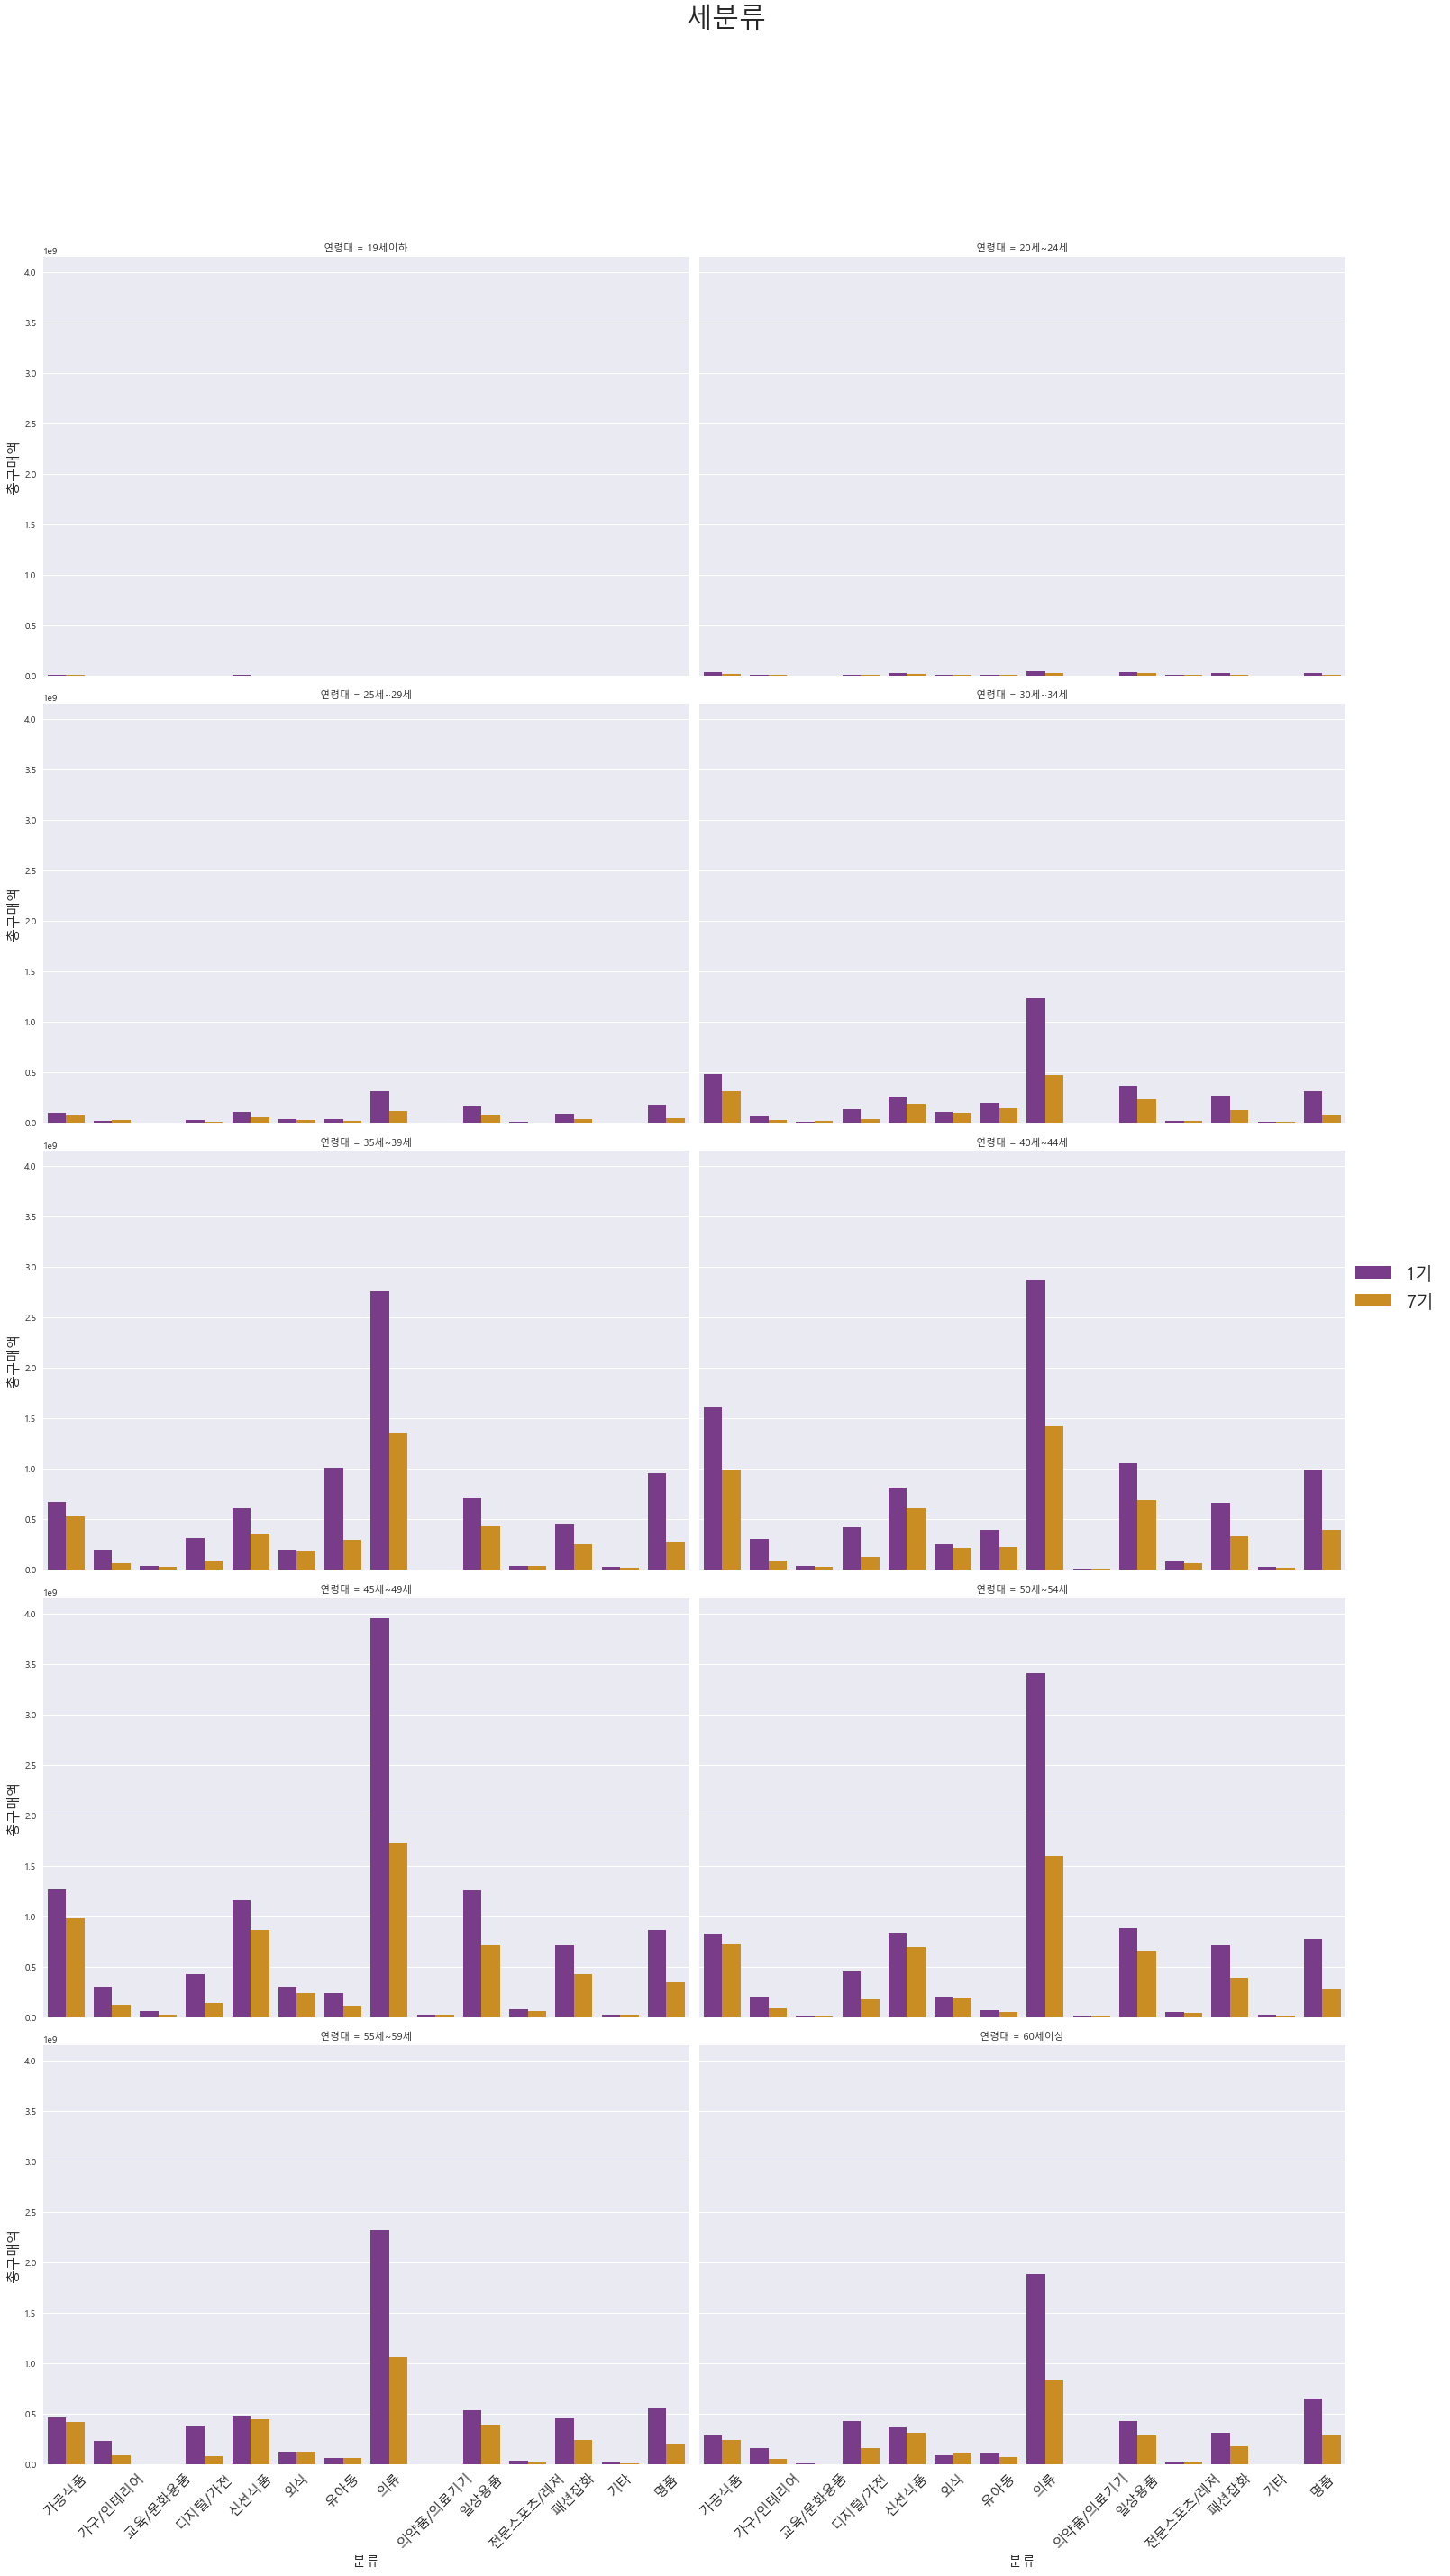

In [272]:
df_down_re_scaled = new_seasonal_scaled(df_down_re)
df_down_re_scaled = df_down_re_scaled.groupby(['연령대', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '연령대', col_wrap = 2, height = 7, aspect = 1.5, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
# ax1.set_title('여자', fontsize = 20)
# ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

## # 증가고객
---

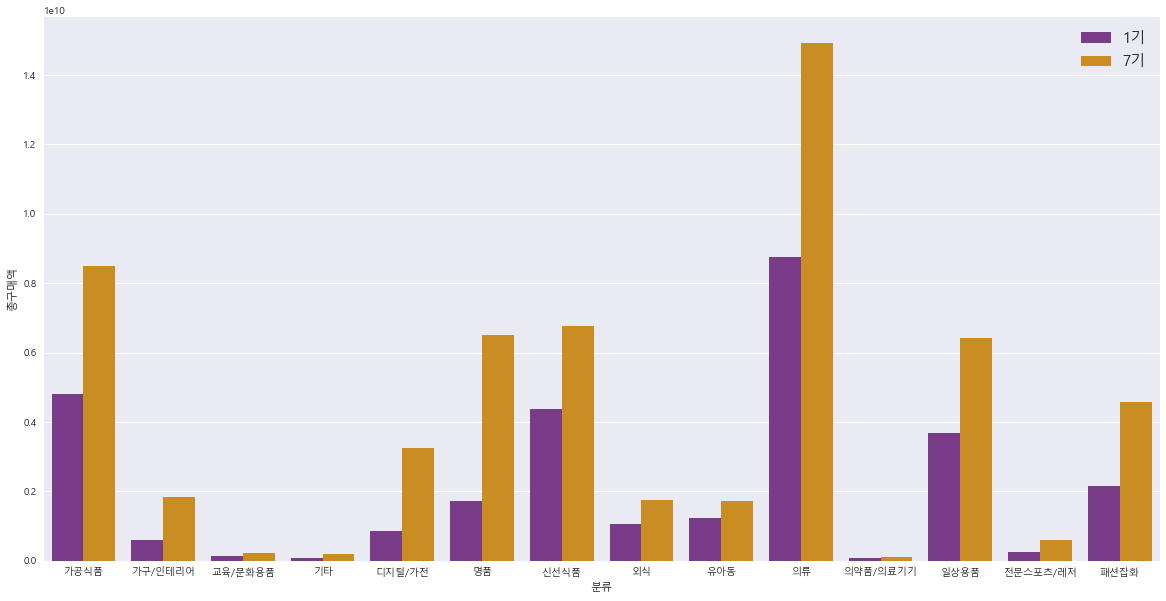

In [274]:
df_up_re_scaled = new_seasonal_scaled(df_up_re)
df_up_re_scaled = df_up_re_scaled.groupby(['기', '분류']).sum()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_up_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.show()

# # 선매품
---

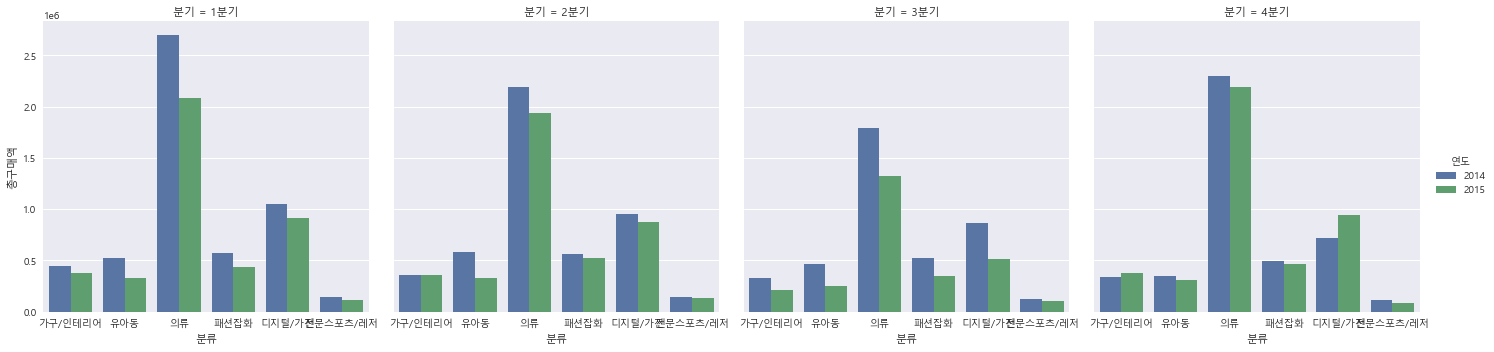

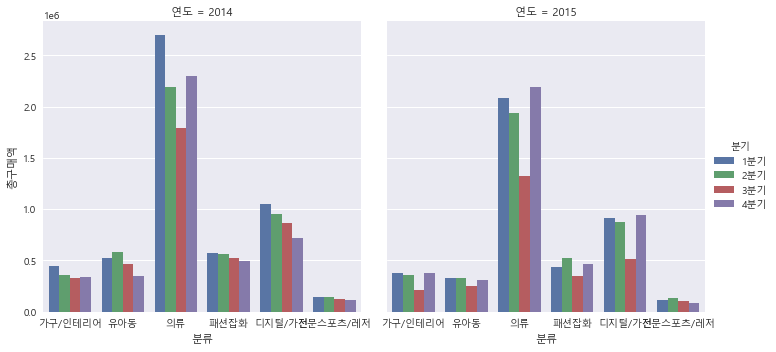

In [101]:
sns.catplot(data = df3, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
plt.show()

sns.catplot(data = df3, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
plt.show()

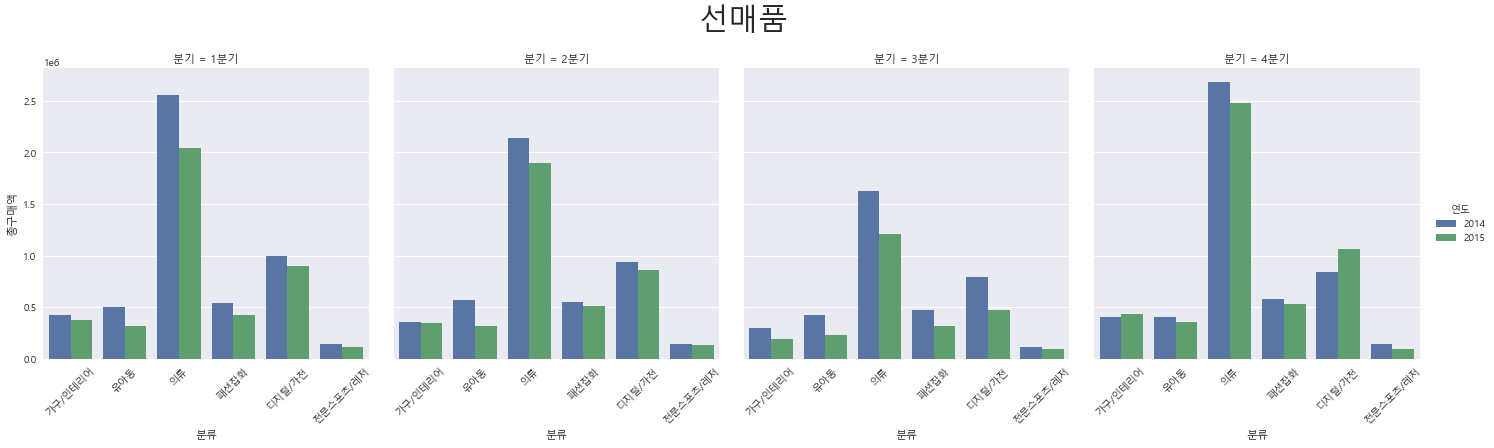

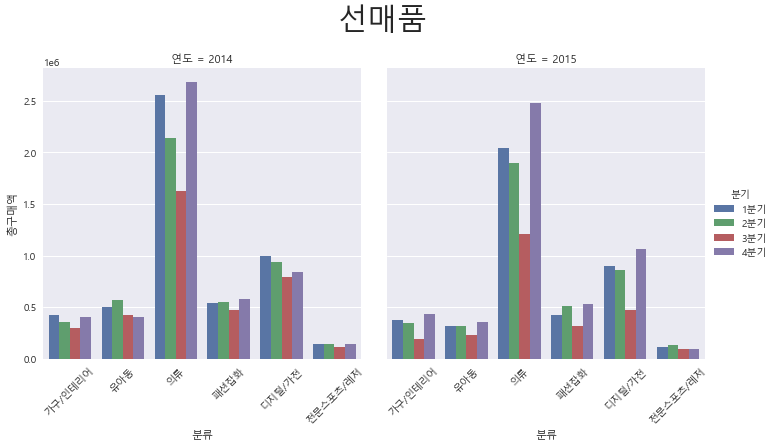

In [6]:
# 계절성 보정 없이

df100 = df.loc[df['세분류명'] == '선매품']
df100.groupby(['연도', '분기', '분류']).sum().reset_index()

ax = sns.catplot(data = df100, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
ax.set_xticklabels(rotation = 45)
ax.fig.suptitle('선매품',x = 0.5, y = 1.1 ,fontsize = 30)
plt.show()
plt.close()

ax = sns.catplot(data = df100, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
ax.set_xticklabels(rotation = 45)
ax.fig.suptitle('선매품',x = 0.5, y = 1.1 ,fontsize = 30)
plt.show()
plt.close()

## # 감소고객
---

In [ ]:
df_down_scaled = new_seasonal_scaled(df_down.loc[df_down['세분류명'] == '선매품'])
df_down_scaled = df_down_scaled.groupby(['기', '분류']).sum()
df_down_scaled = df_down_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

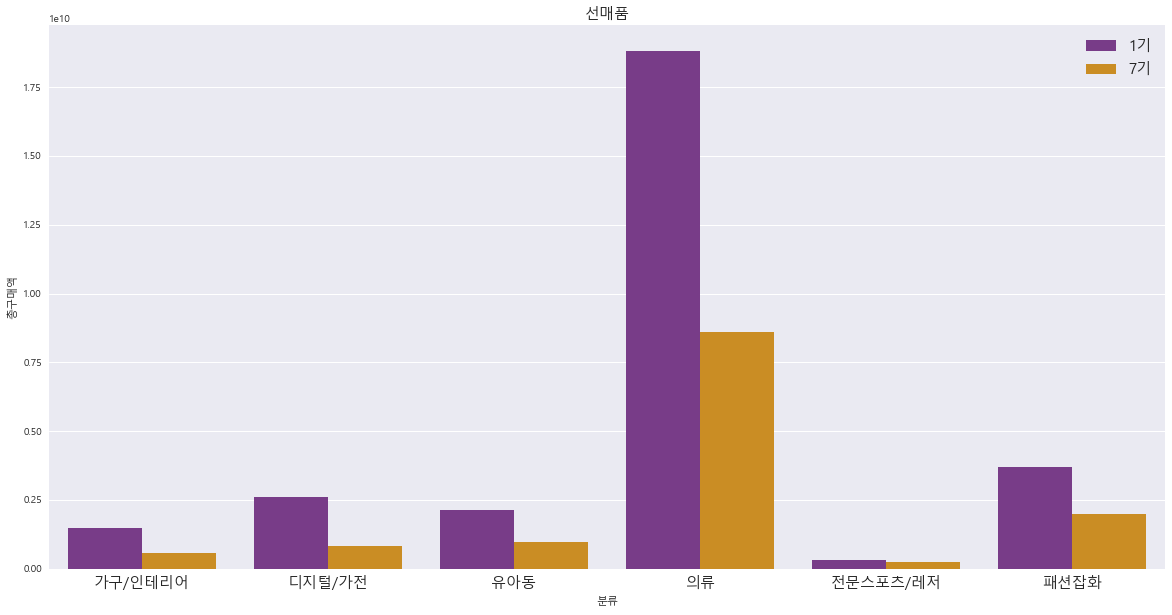

In [113]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '선매품'])
df_down_re_scaled = df_down_re_scaled.groupby(['기', '분류']).sum()
df_down_re_scaled = df_down_re_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_re_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.title('선매품', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

### # 성별
---

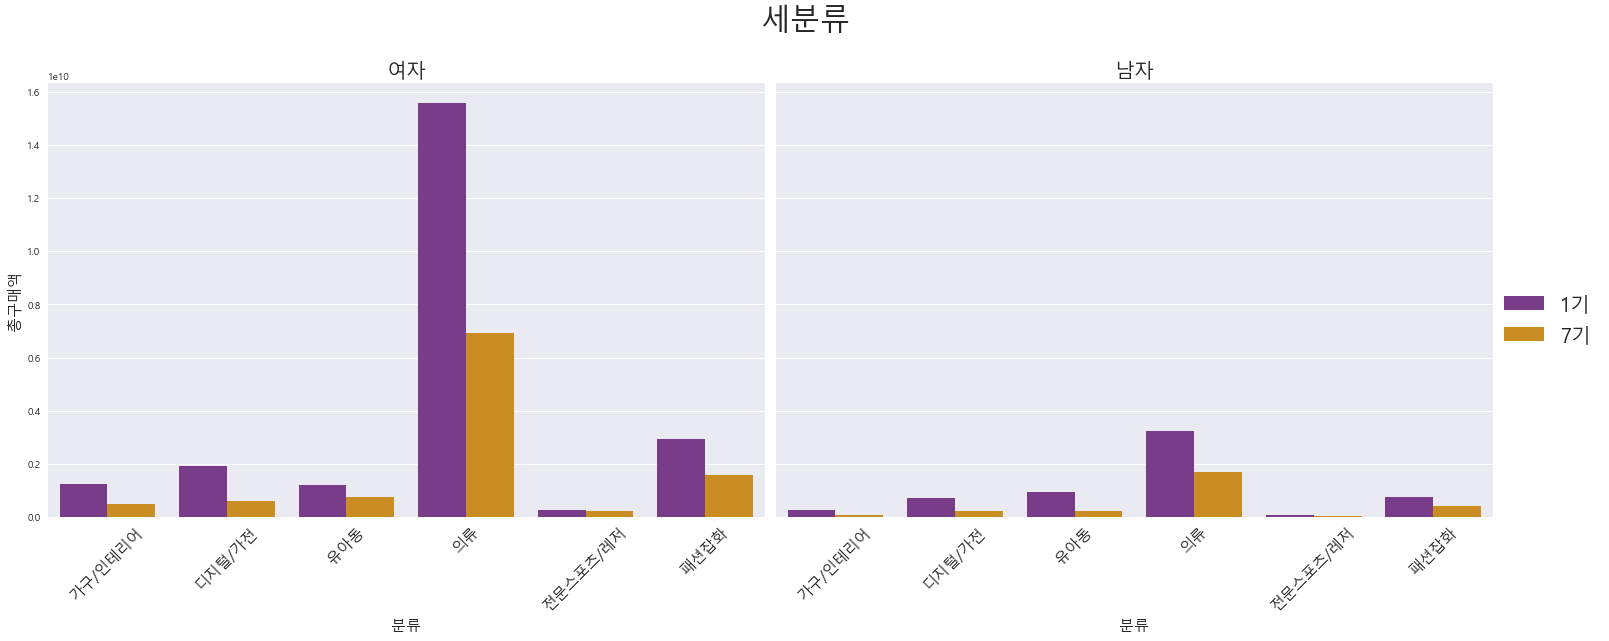

In [253]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '선매품'])
df_down_re_scaled = df_down_re_scaled.groupby(['성별', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '성별', height = 7, aspect = 1.5, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
ax1.set_title('여자', fontsize = 20)
ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

### # 연령대
---

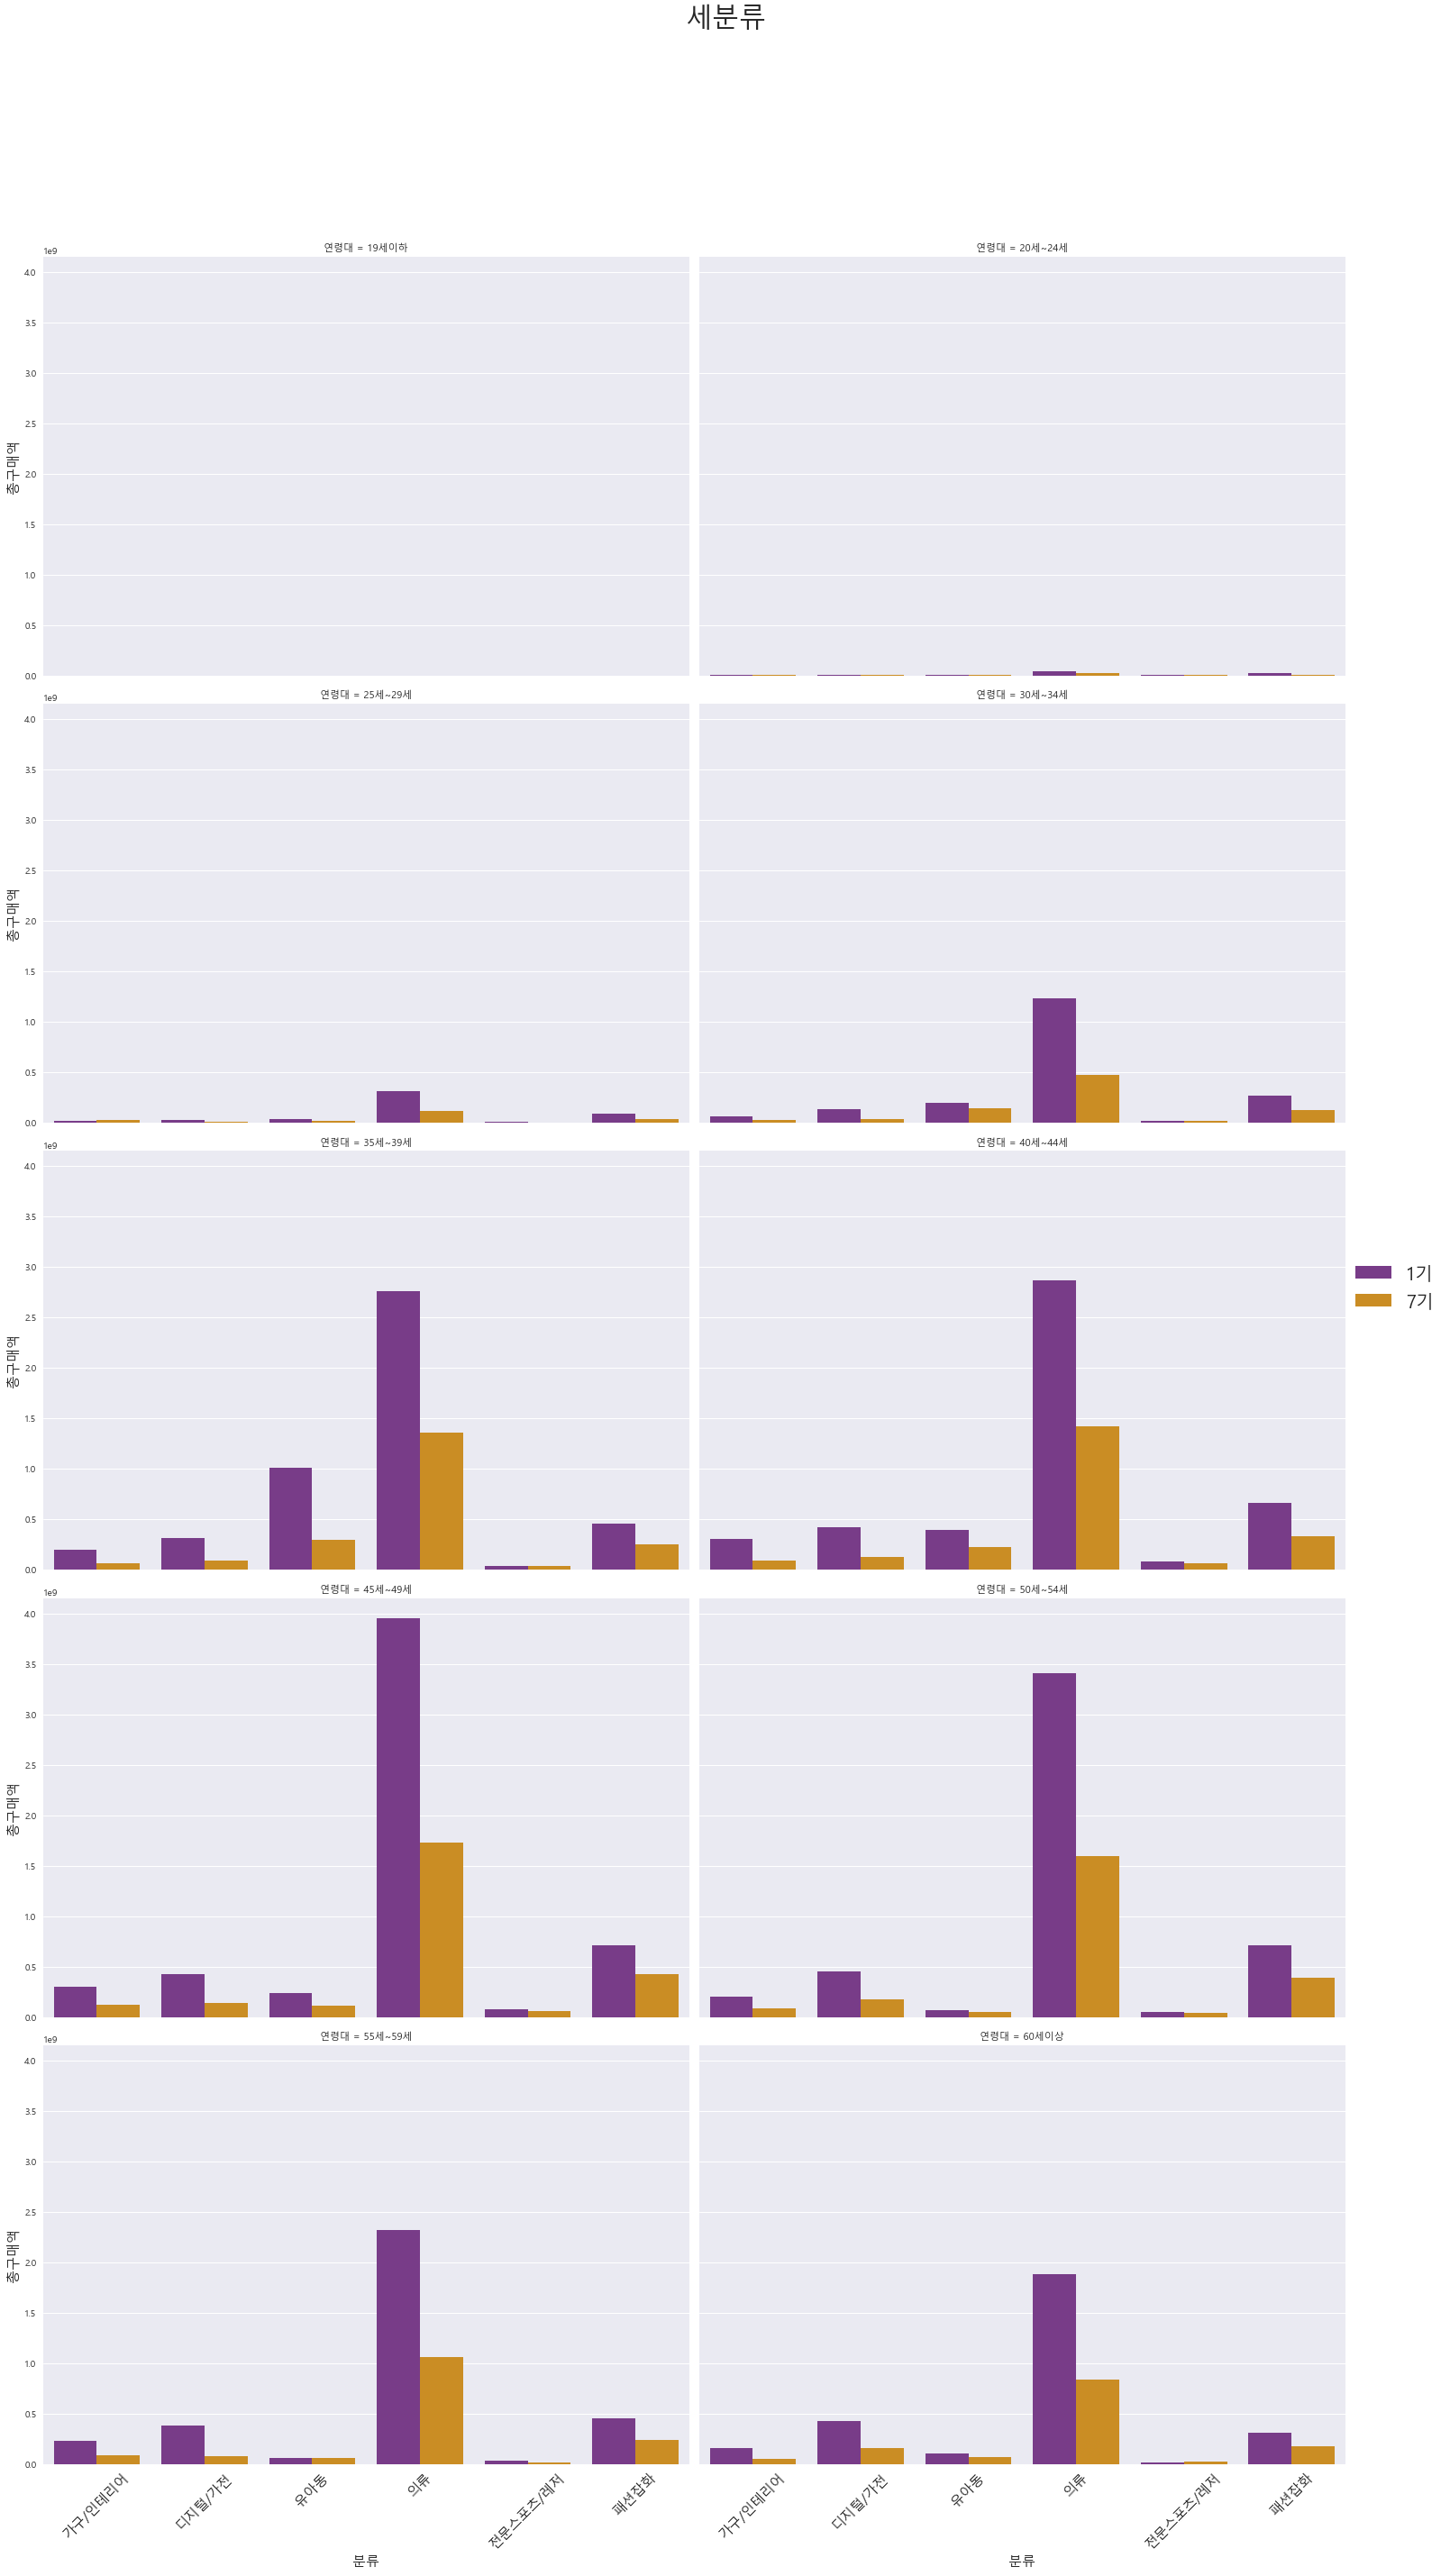

In [273]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '선매품'])
df_down_re_scaled = df_down_re_scaled.groupby(['연령대', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '연령대', col_wrap = 2, height = 7, aspect = 1.5, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
# ax1.set_title('여자', fontsize = 20)
# ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

## # 증가고객
---

In [ ]:
df_up_scaled = new_seasonal_scaled(df_up.loc[df_up['세분류명'] == '선매품'])
df_up_scaled = df_up_scaled.groupby(['기', '분류']).sum()
df_up_scaled = df_up_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_up_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

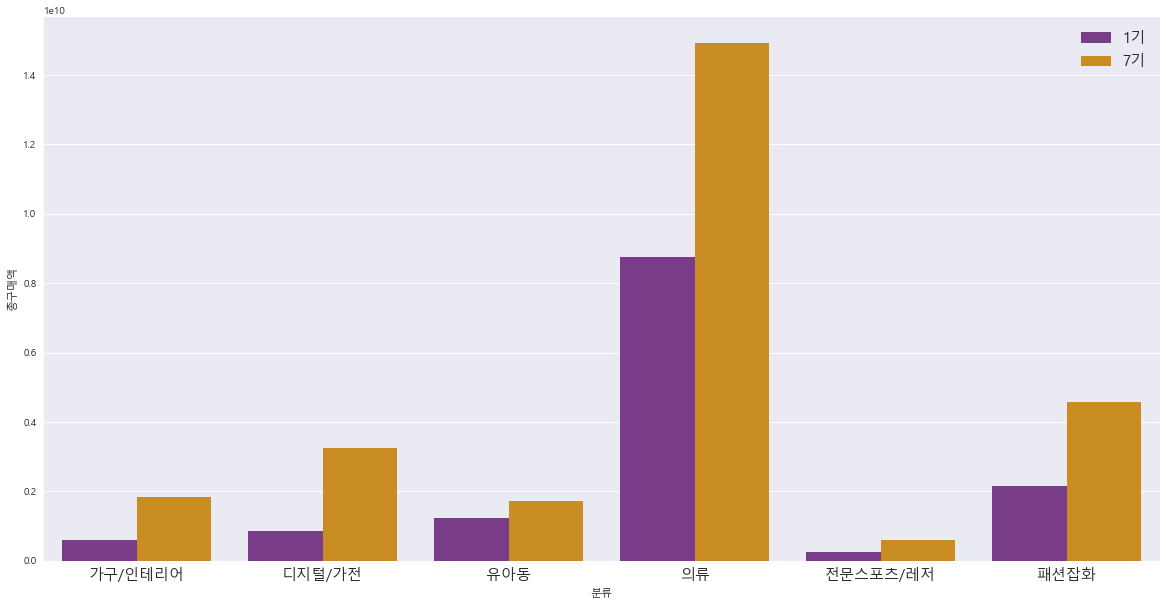

In [111]:
df_up_re_scaled = new_seasonal_scaled(df_up_re.loc[df_up_re['세분류명'] == '선매품'])
df_up_re_scaled = df_up_re_scaled.groupby(['기', '분류']).sum()
df_up_re_scaled = df_up_re_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_up_re_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

# # 전문품
---

In [ ]:
df4 = df1.loc[df1['세분류명'] == '전문품']
df4.groupby(['연도', '분기', '분류']).sum().reset_index()
df4['분류'].unique()

sns.catplot(data = df4, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False, col_order = ['1분기', '2분기', '3분기', '4분기'])
plt.show()
sns.catplot(data = df4, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False, hue_order = ['1분기', '2분기', '3분기', '4분기'])
plt.show()

## # 감소고객
---

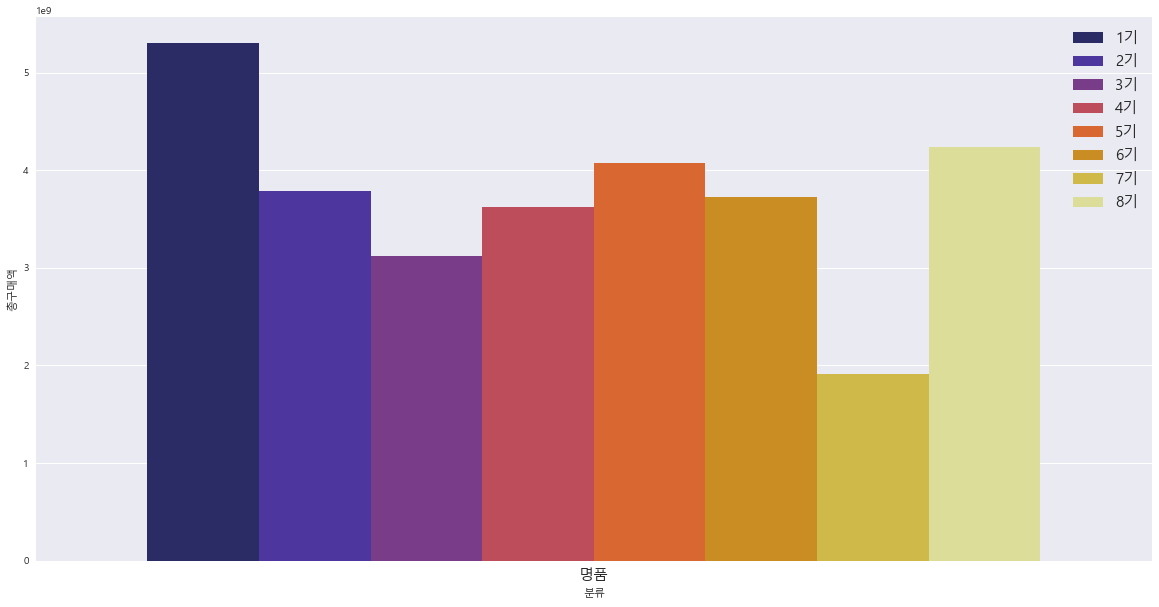

In [52]:
df_down_scaled = new_seasonal_scaled(df_down.loc[df_down['세분류명'] == '전문품'])
df_down_scaled = df_down_scaled.groupby(['기', '분류']).sum()
df_down_scaled = df_down_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

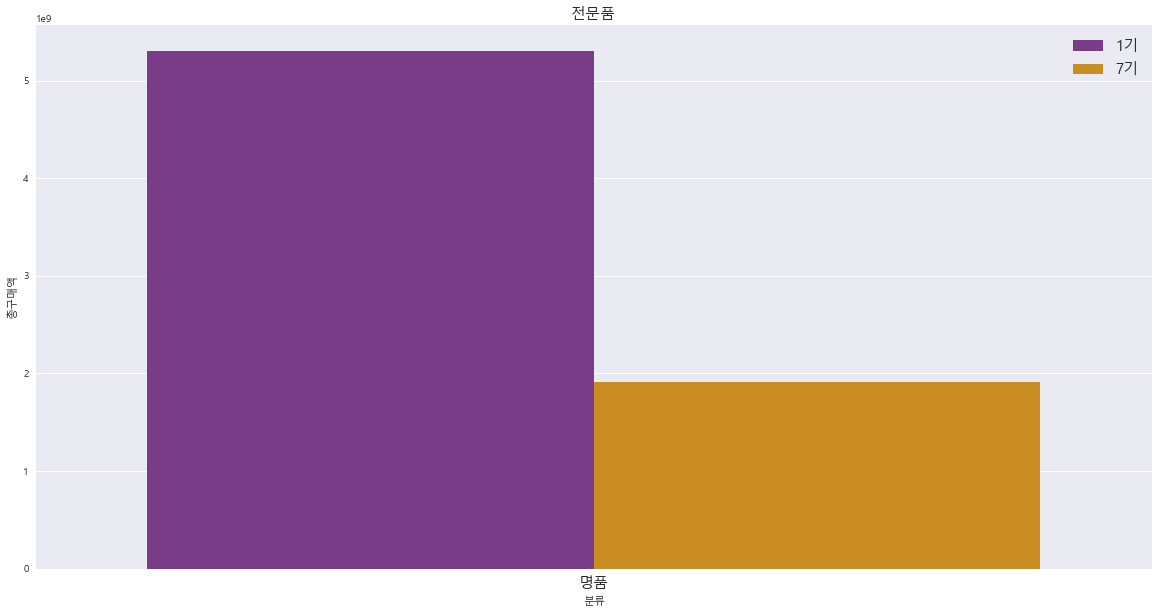

In [114]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '전문품'])
df_down_re_scaled = df_down_re_scaled.groupby(['기', '분류']).sum()
df_down_re_scaled = df_down_re_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_re_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.title('전문품', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

### # 성별
---

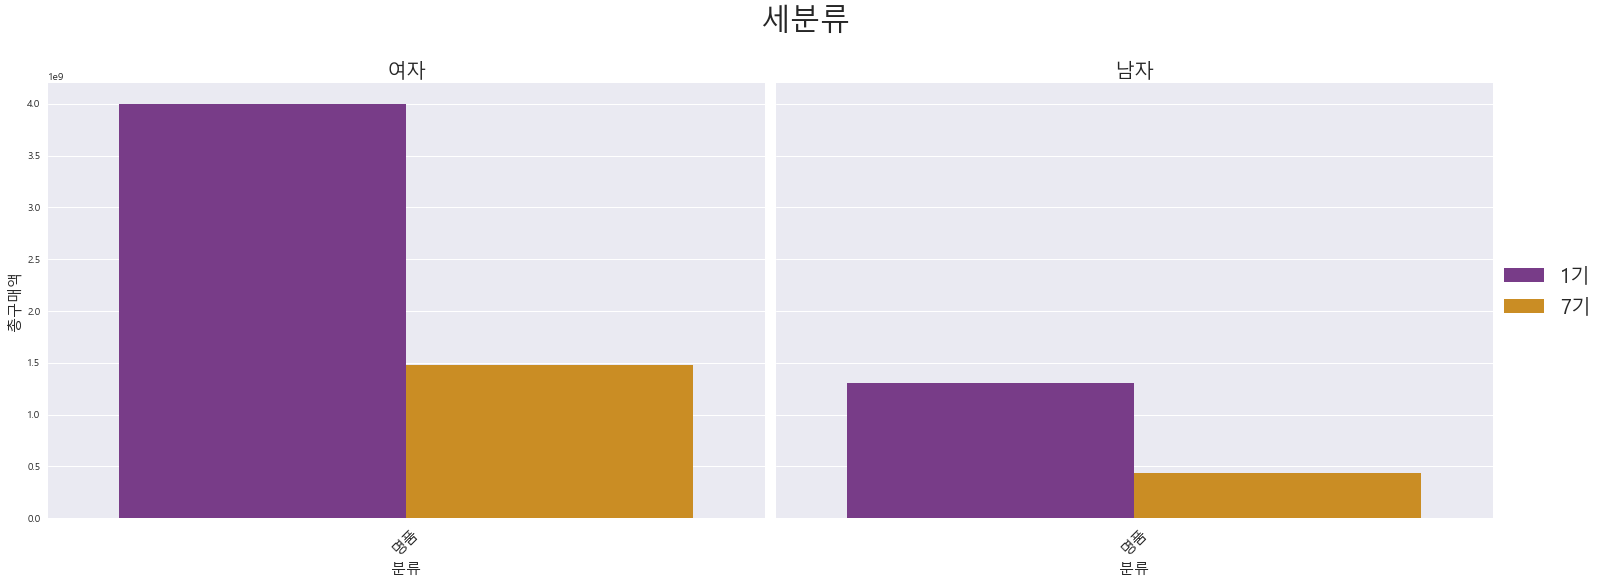

In [246]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '전문품'])
df_down_re_scaled = df_down_re_scaled.groupby(['성별', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '성별', height = 7, aspect = 1.5, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
ax1.set_title('여자', fontsize = 20)
ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

## # 증가고객
---

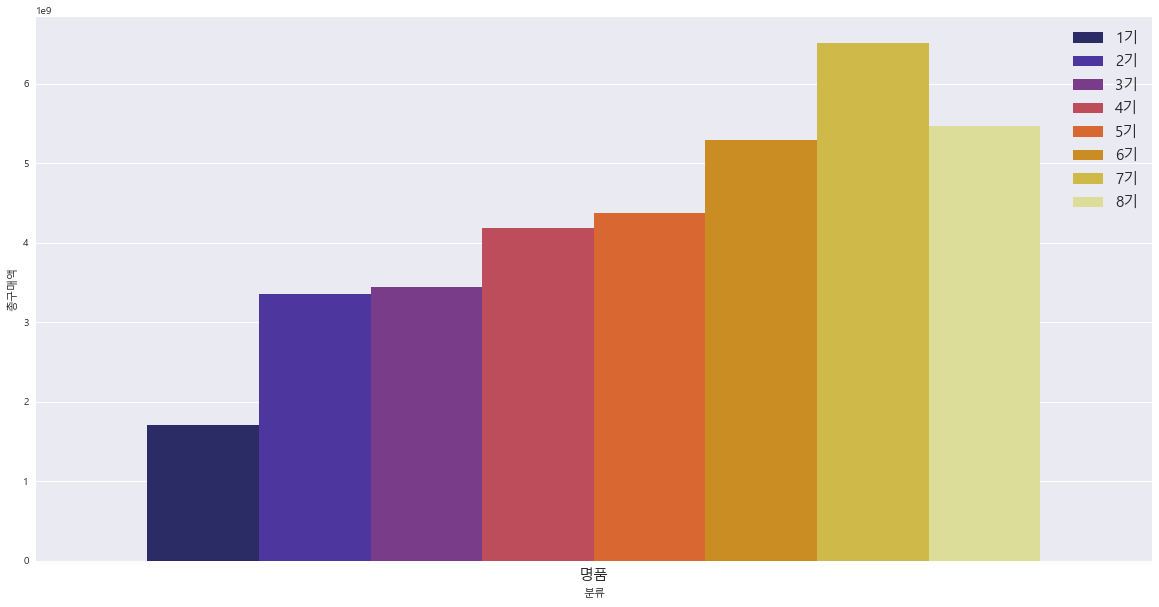

In [53]:
df_up_scaled = new_seasonal_scaled(df_up.loc[df_up['세분류명'] == '전문품'])
df_up_scaled = df_up_scaled.groupby(['기', '분류']).sum()
df_up_scaled = df_up_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_up_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

# # 편의품
---

In [ ]:
df5 = df1.loc[df1['세분류명'] == '편의품']
df5.groupby(['연도', '분기', '분류']).sum().reset_index()
df5['분류'].unique()

plt.figure(figsize = (30, 10))
ax = sns.catplot(data = df5, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
ax.set_xticklabels(rotation = 45)
ax.fig.suptitle('편의품',x = 0.5, y = 1.1 ,fontsize = 30)
plt.show()
plt.close()

ax = sns.catplot(data = df5, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
ax.set_xticklabels(rotation = 45)
ax.fig.suptitle('편의품',x = 0.5, y = 1.1 ,fontsize = 30)
plt.show()
plt.close()

## # 감소고객
---

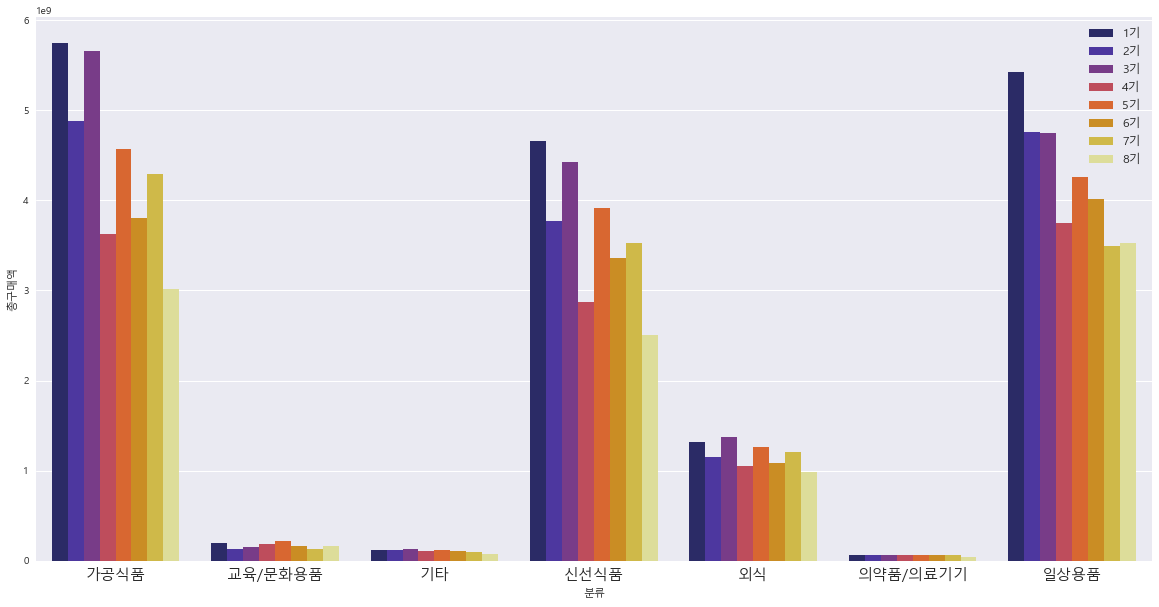

In [54]:
df_down_scaled = new_seasonal_scaled(df_down.loc[df_down['세분류명'] == '편의품'])
df_down_scaled = df_down_scaled.groupby(['기', '분류']).sum()
df_down_scaled = df_down_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 12, loc = 'best')
plt.xticks(fontsize = 15)
plt.show()

### # 성별
---

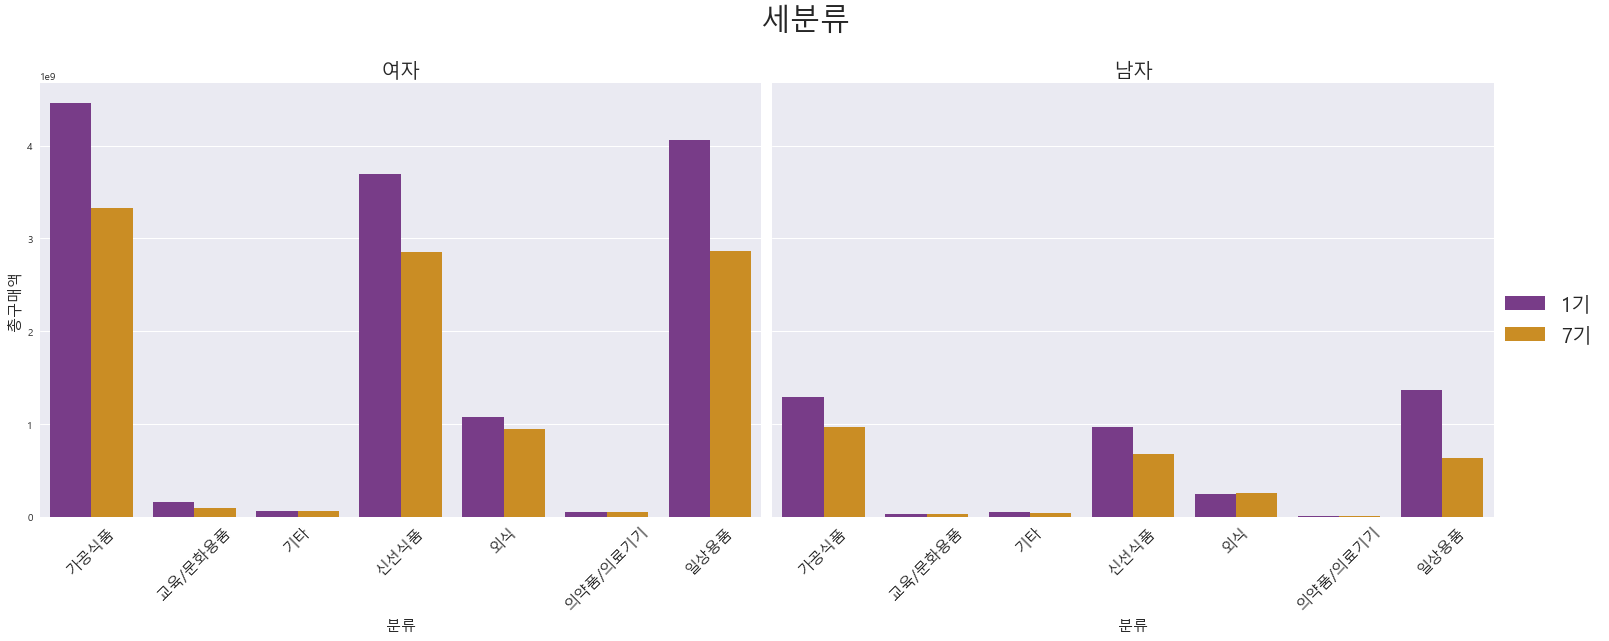

In [259]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '편의품'])
df_down_re_scaled = df_down_re_scaled.groupby(['성별', '기', '분류']).sum()

g = sns.catplot(data = df_down_re_scaled.reset_index(), x = '분류', y = '총구매액', hue = '기', col = '성별', height = 7, aspect = 1.5, palette = 'CMRmap', kind = 'bar', legend = False)
g.set_xticklabels(rotation = 45, fontsize = 15)
g.fig.suptitle('세분류', x = 0.5, y = 1.1 ,fontsize = 30)
g.set_axis_labels('분류', '총구매액', fontsize = 15)
g.add_legend(fontsize = 20)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

fig = g.fig
ax1 = fig.axes[0]
ax2 = fig.axes[1]
ax1.set_title('여자', fontsize = 20)
ax2.set_title('남자', fontsize = 20)

plt.show()
plt.close()

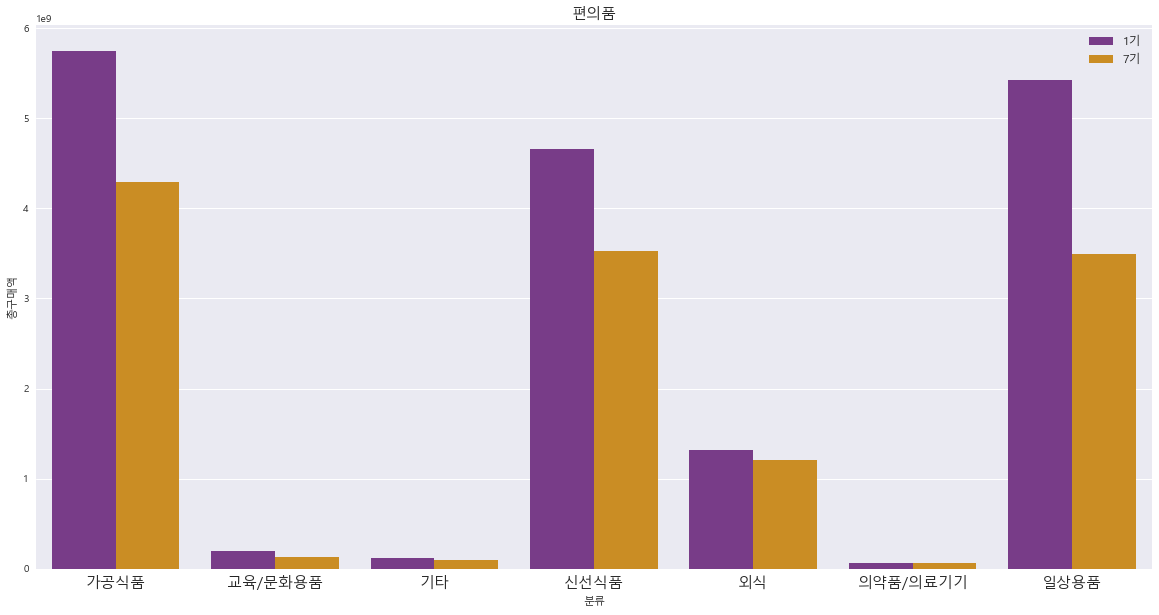

In [116]:
df_down_re_scaled = new_seasonal_scaled(df_down_re.loc[df_down_re['세분류명'] == '편의품'])
df_down_re_scaled = df_down_re_scaled.groupby(['기', '분류']).sum()
df_down_re_scaled = df_down_re_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_down_re_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 12, loc = 'best')
plt.title('편의품', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

## # 증가고객
---

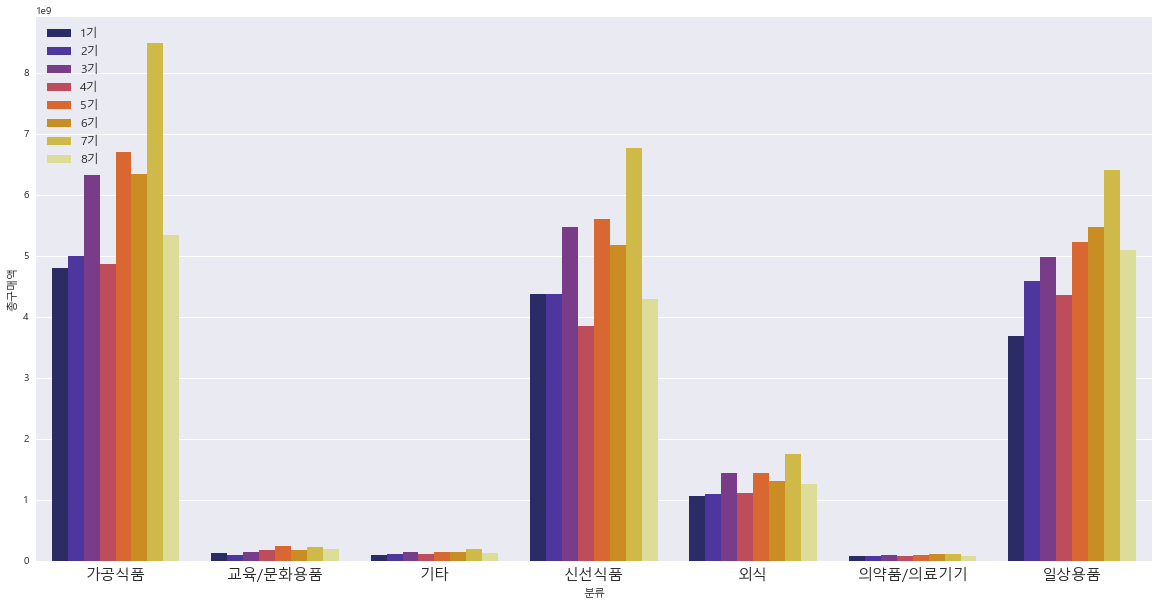

In [55]:
df_up_scaled = new_seasonal_scaled(df_up.loc[df_up['세분류명'] == '편의품'])
df_up_scaled = df_up_scaled.groupby(['기', '분류']).sum()
df_up_scaled = df_up_scaled.reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(data = df_up_scaled, x = '분류', y = '총구매액', hue = '기', palette = 'CMRmap')
plt.legend(fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()

# # 고정고객 총매출 분석
---

In [149]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분, sum(구매금액) "총구매액"
FROM LCL a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분
ORDER BY a.고객번호, 연도, 분기, 세분류명, 분류'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연도', '분기', '세분류명', '분류', '고객구분', '총구매액']
df10 = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()

display(df10.head())

,고객번호,성별,연도,분기,세분류명,분류,고객구분,총구매액
0,00001,M,2014,1분기,선매품,가구/인테리어,감소,177650
1,00001,M,2014,1분기,선매품,유아동,감소,103740
2,00001,M,2014,1분기,선매품,의류,감소,5001720
3,00001,M,2014,1분기,선매품,패션잡화,감소,427040
4,00001,M,2014,1분기,편의품,가공식품,감소,1208630


In [174]:
df11 = seasonal_scaled(df10)
df11

,고객번호,성별,연도,분기,세분류명,분류,고객구분,총구매액
0,00001,M,2014,1분기,선매품,가구/인테리어,감소,187466
1,00001,M,2014,1분기,선매품,유아동,감소,109472
2,00001,M,2014,1분기,선매품,의류,감소,5278081
3,00001,M,2014,1분기,선매품,패션잡화,감소,450635
4,00001,M,2014,1분기,편의품,가공식품,감소,1275411
...,...,...,...,...,...,...,...,...
1171313,19337,M,2015,4분기,선매품,패션잡화,증가,121697
1171314,19337,M,2015,4분기,편의품,가공식품,증가,633662
1171315,19337,M,2015,4분기,편의품,신선식품,증가,113610
1171316,19337,M,2015,4분기,편의품,의약품/의료기기,증가,7681


In [198]:
df11.loc[(df11['연도'] == 2014), ()]['총구매액'].sum()

326890579100

In [ ]:
667586918719

In [178]:
df11_re = df10.groupby(['연도']).sum()
df11_re

,총구매액
연도,
2014,326890578668
2015,341534547930


In [197]:
# 고정고객 총 매출

df11_re1 = df11.groupby(['연도', '고객구분']).sum()
df11_re1

총구매액
연도   고객구분              
2014 감소    174261680270
     증가    152628898830
2015 감소    140680514243
     증가    200854034588

In [193]:
# 고정고객의 연도기준 총매출 증감

(341534547930 - 326890578668)/326890578668

0.044797770928947024

In [196]:
# 왜 구매감소고객의 매출을 증가시켜야하는가

33581166027
((341534547930 + 33581166027) - 326890578668)/326890578668

0.1475268436475158

In [183]:
# 고정고객 총매출의 증감율

print((140680514243 - 174261680270)/174261680270 * 100)
print((200854034588 - 152628898830)/152628898830 * 100)

-19.270539555781593
31.59633341239903


In [ ]:
140680514243 - 174261680270

In [49]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT 연도,분기, 제휴사, SUM(구매금액) "총구매액" 
FROM LCL a
join
고정고객 b on a.고객번호 = b.고객번호
where 고객구분='증가'
GROUP BY 연도, 분기, 제휴사
ORDER BY 연도, 분기, 제휴사'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기','제휴사','총구매액']
df_re = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()

display(df_re.head())

,연도,분기,제휴사,총구매액
0,2014,1분기,A,19180783990
1,2014,1분기,B,6311273350
2,2014,1분기,C,2750815440
3,2014,1분기,D,21033530
4,2014,2분기,A,27456278300


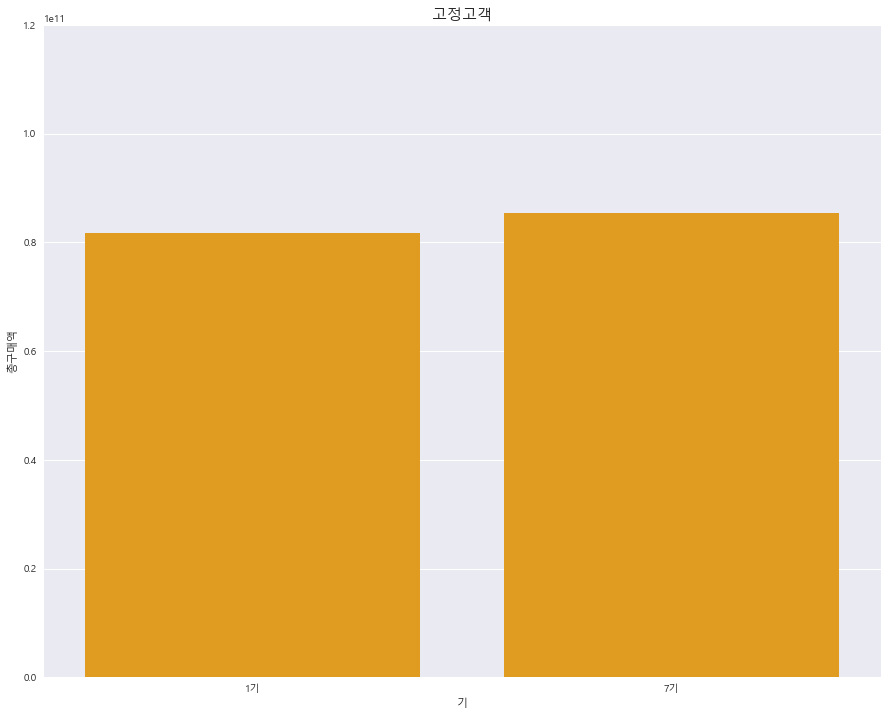

In [83]:
a = pd.DataFrame(columns = ['기', '총구매액'])
a['기'] = ['1기', '7기']
a['총구매액'] = [81722645452, 85383638142]
plt.figure(figsize = (15, 12))
sns.barplot(data = a, x = '기', y = '총구매액' , color = 'orange')
plt.ylim(0, 1.2 * 1e11)
plt.title('고정고객', fontsize = 15)
plt.show()

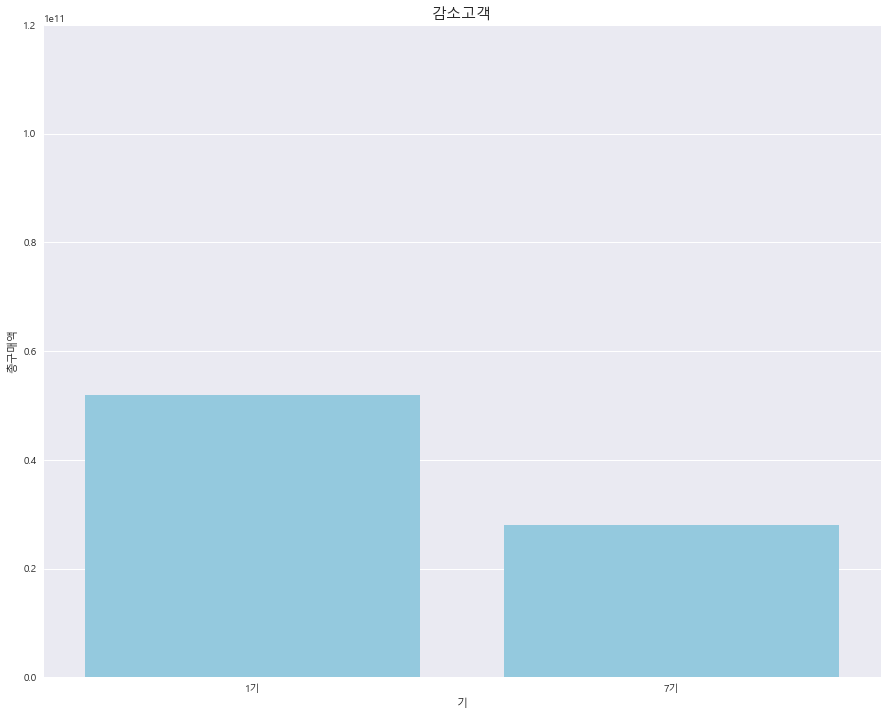

In [86]:
a = pd.DataFrame(columns = ['기', '총구매액'])
a['기'] = ['1기', '7기']
a['총구매액'] = [51897068780, 27998587884]
plt.figure(figsize = (15, 12))
sns.barplot(data = a, x = '기', y = '총구매액' , color = 'skyblue')
plt.ylim(0, 1.2 * 1e11)
plt.title('감소고객', fontsize = 15)
plt.show()

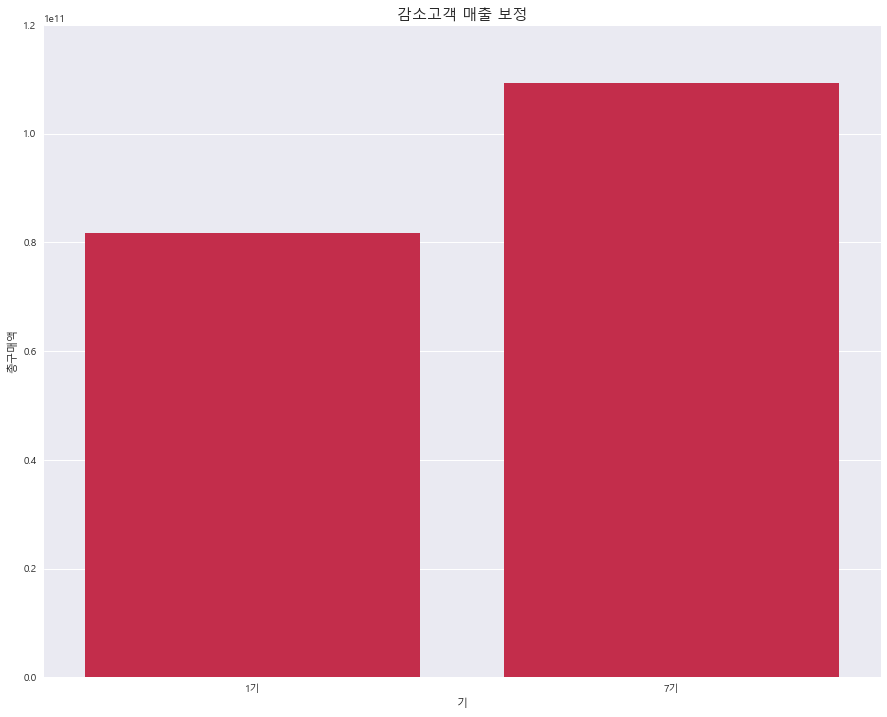

In [99]:
b = pd.DataFrame(columns = ['기', '총구매액'])
b['기'] = ['1기', '7기']
b['총구매액'] = [81722645452, 85383638142 + 23898480896]
plt.figure(figsize = (15, 12))
sns.barplot(data = b, x = '기', y = '총구매액', color = 'crimson')
plt.title('감소고객 매출 보정', fontsize = 15)
plt.ylim(0, 1.2 * 1e11)
plt.show()

# # 고정 고객의 기수별 매출 변화
---

In [10]:
df_all_scaled = new_seasonal_scaled(df_all)
df_all_scaled.head()

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,187466
1,00001,M,60세이상,서울,선매품,가구/인테리어,감소,3기,70365
2,00001,M,60세이상,서울,선매품,가구/인테리어,감소,4기,4034433
3,00001,M,60세이상,서울,선매품,가구/인테리어,감소,5기,87708
4,00001,M,60세이상,서울,선매품,가구/인테리어,감소,6기,502593
...,...,...,...,...,...,...,...,...,...
1171313,19337,M,20세~24세,서울,편의품,일상용품,증가,4기,33183
1171314,19337,M,20세~24세,서울,편의품,일상용품,증가,5기,22240
1171315,19337,M,20세~24세,서울,편의품,일상용품,증가,6기,1196
1171316,19337,M,20세~24세,서울,편의품,일상용품,증가,7기,17102


In [23]:
aaa = df_all_scaled.groupby(['분류', '기']).sum().reset_index()
aaa

,분류,기,총구매액
0,가공식품,1기,10553976942
1,가공식품,2기,9880462862
2,가공식품,3기,11982866426
3,가공식품,4기,8495151676
4,가공식품,5기,11265979354
...,...,...,...
107,패션잡화,4기,6856168753
108,패션잡화,5기,5785039541
109,패션잡화,6기,7238565630
110,패션잡화,7기,6580851154


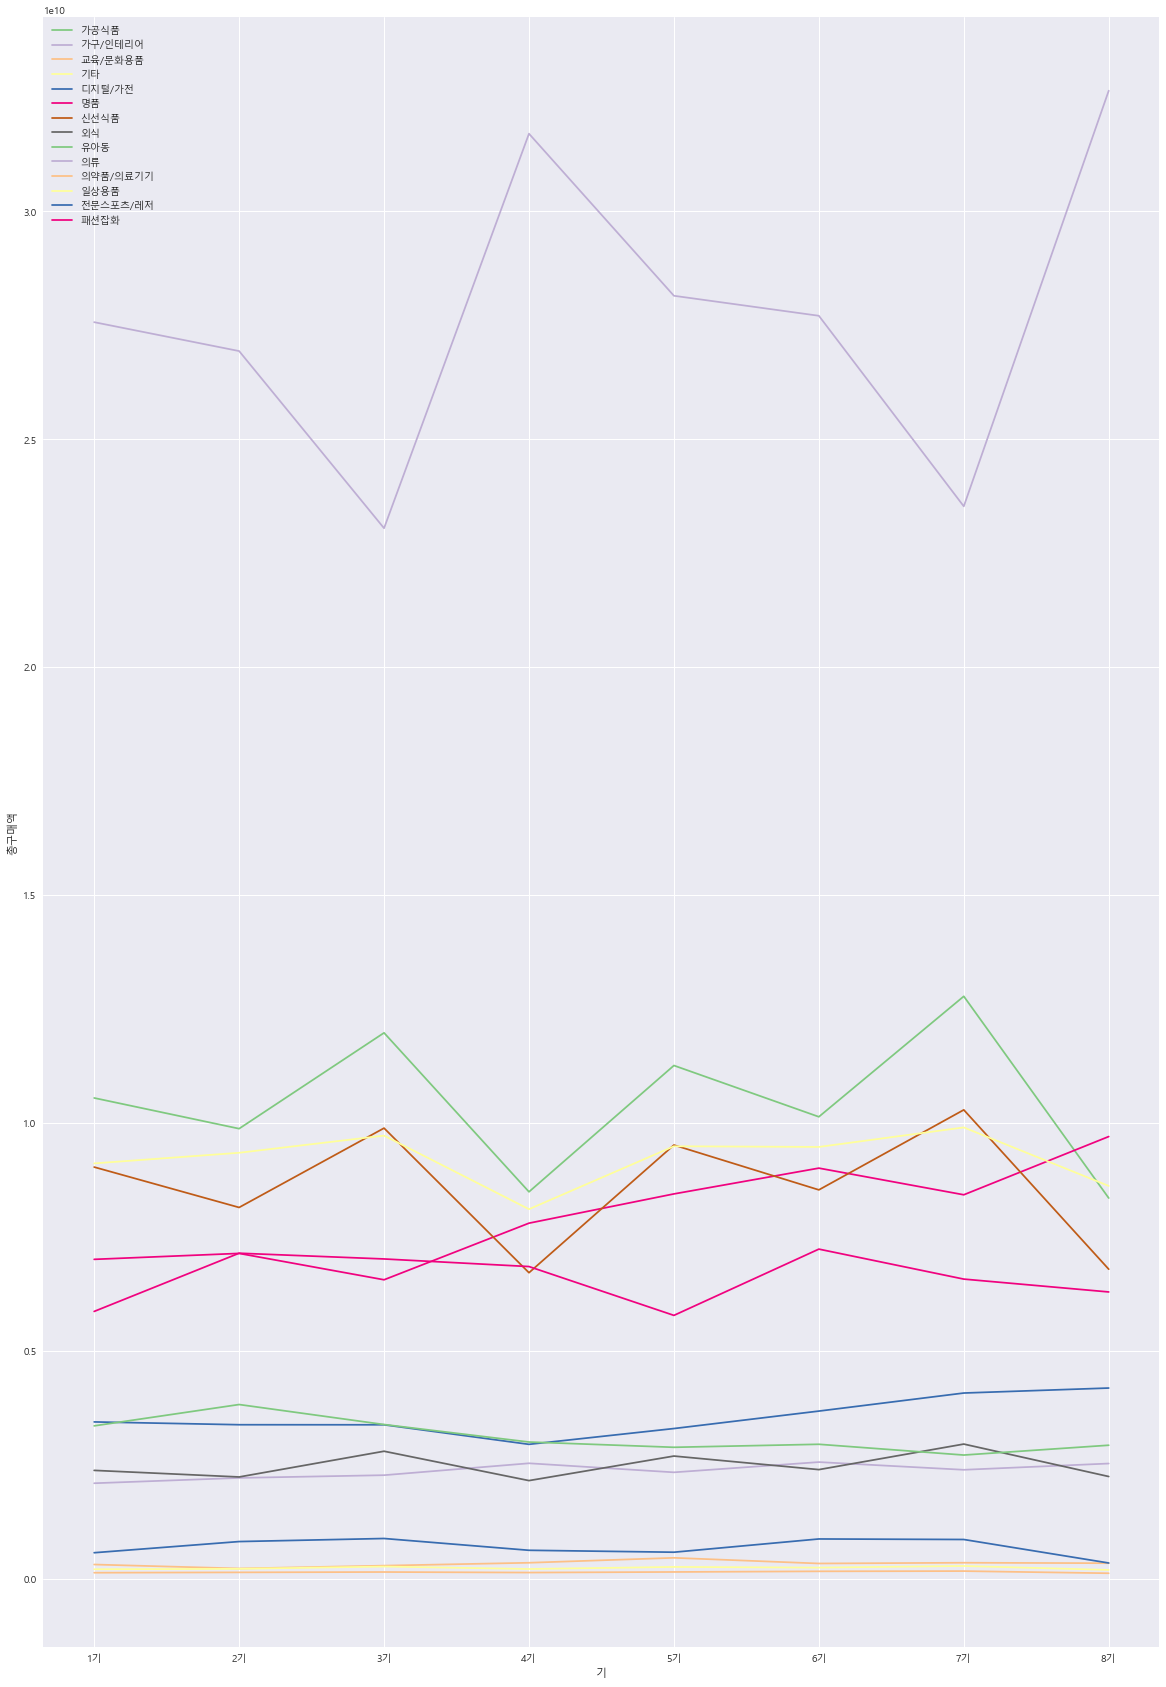

In [42]:
plt.figure(figsize = (20, 30))
sns.lineplot(data = aaa, x = '기', y = '총구매액', hue = '분류', palette = 'Accent')
plt.legend();